In [117]:
#Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [118]:
#Read/Load the dataset
meat_consumption = pd.read_csv("FAO food supply quantity1.csv")
real_GDP = pd.read_csv("FAO GDP dollar 2015 prices1.csv")
nominal_GDP = pd.read_csv("FAO GDP dollar1.csv")
population = pd.read_csv("FAO Population1.csv")
mean_years_schooling = pd.read_csv("Mean Years of Schooling1.csv")
religion = pd.read_csv("Religion Composition1.csv")
female_labour_force = pd.read_csv("female labor participation - ajuste.csv")
urbanization = pd.read_csv("FAOSTAT urbanisation.csv")

### Faostat food supply dataset
+ Food supply quantity (kg/capita/year) in 2020
+ by type of meat (bovine, mutton & goat, pigmeat, poultry, meat other)
+ The meat consumption per capita in kg/ capita/year was obtained by dividing the total meat supply of all the countries included in a region by the total population of the same region.

In [119]:
meat_consumption

,Country,Element,Item,Year,Unit,Value
0,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2020,kg,3.23
1,Afghanistan,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,2020,kg,4.04
2,Afghanistan,Food supply quantity (kg/capita/yr),Pigmeat,2020,kg,0.00
3,Afghanistan,Food supply quantity (kg/capita/yr),Poultry Meat,2020,kg,1.71
4,Afghanistan,Food supply quantity (kg/capita/yr),"Meat, Other",2020,kg,0.30
...,...,...,...,...,...,...
922,Zimbabwe,Food supply quantity (kg/capita/yr),Bovine Meat,2020,kg,42.30
923,Zimbabwe,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,2020,kg,1.86
924,Zimbabwe,Food supply quantity (kg/capita/yr),Pigmeat,2020,kg,0.68
925,Zimbabwe,Food supply quantity (kg/capita/yr),Poultry Meat,2020,kg,4.62


In [120]:
def a(row):
    if row['Item'] == 'Bovine Meat':
        val = row['Value']
    else:
        val = 0
    return val

def b(row):
    if row['Item'] == 'Mutton & Goat Meat':
        val = row['Value']
    else:
        val = 0
    return val

def c(row):
    if row['Item'] == 'Pigmeat':
        val = row['Value']
    else:
        val = 0
    return val

def d(row):
    if row['Item'] == 'Poultry Meat':
        val = row['Value']
    else:
        val = 0
    return val

def e(row):
    if row['Item'] == 'Meat, Other':
        val = row['Value']
    else:
        val = 0
    return val

In [121]:
meat_consumption['Bovine Meat Consumption'] = meat_consumption.apply(a,axis=1)
meat_consumption['Mutton & Goat Meat Consumption'] = meat_consumption.apply(b,axis=1)
meat_consumption['Pigmeat Consumption'] = meat_consumption.apply(c,axis=1)
meat_consumption['Poultry Meat Consumption'] = meat_consumption.apply(d,axis=1)
meat_consumption['Meat, Other Consumption'] = meat_consumption.apply(e,axis=1)

In [122]:
meat_consumption

,Country,Element,Item,Year,Unit,Value,Bovine Meat Consumption,Mutton & Goat Meat Consumption,Pigmeat Consumption,Poultry Meat Consumption,"Meat, Other Consumption"
0,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2020,kg,3.23,3.23,0.00,0.00,0.00,0.00
1,Afghanistan,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,2020,kg,4.04,0.00,4.04,0.00,0.00,0.00
2,Afghanistan,Food supply quantity (kg/capita/yr),Pigmeat,2020,kg,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Food supply quantity (kg/capita/yr),Poultry Meat,2020,kg,1.71,0.00,0.00,0.00,1.71,0.00
4,Afghanistan,Food supply quantity (kg/capita/yr),"Meat, Other",2020,kg,0.30,0.00,0.00,0.00,0.00,0.30
...,...,...,...,...,...,...,...,...,...,...,...
922,Zimbabwe,Food supply quantity (kg/capita/yr),Bovine Meat,2020,kg,42.30,42.30,0.00,0.00,0.00,0.00
923,Zimbabwe,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,2020,kg,1.86,0.00,1.86,0.00,0.00,0.00
924,Zimbabwe,Food supply quantity (kg/capita/yr),Pigmeat,2020,kg,0.68,0.00,0.00,0.68,0.00,0.00
925,Zimbabwe,Food supply quantity (kg/capita/yr),Poultry Meat,2020,kg,4.62,0.00,0.00,0.00,4.62,0.00


In [123]:
meat_consumption = meat_consumption.drop(['Element','Item','Unit','Value','Year'], axis=1)
meat_consumption

,Country,Bovine Meat Consumption,Mutton & Goat Meat Consumption,Pigmeat Consumption,Poultry Meat Consumption,"Meat, Other Consumption"
0,Afghanistan,3.23,0.00,0.00,0.00,0.00
1,Afghanistan,0.00,4.04,0.00,0.00,0.00
2,Afghanistan,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,0.00,0.00,0.00,1.71,0.00
4,Afghanistan,0.00,0.00,0.00,0.00,0.30
...,...,...,...,...,...,...
922,Zimbabwe,42.30,0.00,0.00,0.00,0.00
923,Zimbabwe,0.00,1.86,0.00,0.00,0.00
924,Zimbabwe,0.00,0.00,0.68,0.00,0.00
925,Zimbabwe,0.00,0.00,0.00,4.62,0.00


In [124]:
Bovine_Meat_Consumption = meat_consumption.drop(['Mutton & Goat Meat Consumption','Pigmeat Consumption','Poultry Meat Consumption','Meat, Other Consumption'], axis=1)
Mutton_and_Goat_Meat_Consumption = meat_consumption.drop(['Bovine Meat Consumption','Pigmeat Consumption','Poultry Meat Consumption','Meat, Other Consumption'], axis=1)
Pigmeat_Consumption = meat_consumption.drop(['Mutton & Goat Meat Consumption','Bovine Meat Consumption','Poultry Meat Consumption','Meat, Other Consumption'], axis=1)
Poultry_Meat_Consumption = meat_consumption.drop(['Mutton & Goat Meat Consumption','Pigmeat Consumption','Bovine Meat Consumption','Meat, Other Consumption'], axis=1)
Meat_Other_Consumption = meat_consumption.drop(['Mutton & Goat Meat Consumption','Pigmeat Consumption','Poultry Meat Consumption','Bovine Meat Consumption'], axis=1)

In [125]:
Bovine_Meat_Consumption = Bovine_Meat_Consumption.replace(0, pd.np.nan)
Mutton_and_Goat_Meat_Consumption = Mutton_and_Goat_Meat_Consumption.replace(0, pd.np.nan)
Pigmeat_Consumption = Pigmeat_Consumption.replace(0, pd.np.nan)
Poultry_Meat_Consumption = Poultry_Meat_Consumption.replace(0, pd.np.nan)
Meat_Other_Consumption = Meat_Other_Consumption.replace(0, pd.np.nan)

C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\3646179179.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  Bovine_Meat_Consumption = Bovine_Meat_Consumption.replace(0, pd.np.nan)
C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\3646179179.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  Mutton_and_Goat_Meat_Consumption = Mutton_and_Goat_Meat_Consumption.replace(0, pd.np.nan)
C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\3646179179.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  Pigmeat_Consumption = Pigmeat_Consumption.replace(0, pd.np.nan)
C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\3646179179.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from

In [126]:
Bovine_Meat_Consumption = Bovine_Meat_Consumption.dropna()
Mutton_and_Goat_Meat_Consumption = Mutton_and_Goat_Meat_Consumption.dropna()
Pigmeat_Consumption = Pigmeat_Consumption.dropna()
Poultry_Meat_Consumption = Poultry_Meat_Consumption.dropna()
Meat_Other_Consumption = Meat_Other_Consumption.dropna()

In [127]:
Bovine_Meat_Consumption

,Country,Bovine Meat Consumption
0,Afghanistan,3.23
5,Albania,11.65
10,Algeria,3.83
15,Angola,3.43
20,Antigua and Barbuda,5.04
...,...,...
902,Venezuela (Bolivarian Republic of),12.02
907,Viet Nam,6.11
912,Yemen,3.03
917,Zambia,9.30


In [128]:
Mutton_and_Goat_Meat_Consumption

,Country,Mutton & Goat Meat Consumption
1,Afghanistan,4.04
6,Albania,8.26
11,Algeria,8.06
16,Angola,0.75
21,Antigua and Barbuda,0.98
...,...,...
903,Venezuela (Bolivarian Republic of),0.34
908,Viet Nam,0.22
913,Yemen,4.36
918,Zambia,0.52


In [129]:
Pigmeat_Consumption

,Country,Pigmeat Consumption
7,Albania,5.25
12,Algeria,0.02
17,Angola,7.04
22,Antigua and Barbuda,14.31
27,Argentina,14.42
...,...,...
899,Vanuatu,12.38
904,Venezuela (Bolivarian Republic of),4.43
909,Viet Nam,38.18
919,Zambia,1.54


In [130]:
Poultry_Meat_Consumption

,Country,Poultry Meat Consumption
3,Afghanistan,1.71
8,Albania,13.94
13,Algeria,6.38
18,Angola,8.41
23,Antigua and Barbuda,61.76
...,...,...
905,Venezuela (Bolivarian Republic of),16.11
910,Viet Nam,15.81
915,Yemen,11.22
920,Zambia,2.64


In [131]:
Meat_Other_Consumption

,Country,"Meat, Other Consumption"
4,Afghanistan,0.30
14,Algeria,0.32
19,Angola,0.30
24,Antigua and Barbuda,0.05
29,Argentina,1.15
...,...,...
901,Vanuatu,0.11
911,Viet Nam,0.28
916,Yemen,0.10
921,Zambia,2.20


### Faostat GDP dollar 2015 constant prices
+ GDP (Gross Domestic Product)
+ Year = 2020
+ Unit = Millions

In [132]:
real_GDP

,Country,Element,Item,Year,Unit,Value
0,Afghanistan,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,20113.068550
1,Albania,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,12541.496770
2,Algeria,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,168331.021400
3,Andorra,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,2648.246726
4,Angola,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,105625.153600
...,...,...,...,...,...,...
206,Venezuela (Bolivarian Republic of),"Value US$, 2015 prices",Gross Domestic Product,2020,millions,97976.208360
207,Viet Nam,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,258508.682800
208,Yemen,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,20625.649850
209,Zambia,"Value US$, 2015 prices",Gross Domestic Product,2020,millions,22986.676830


In [133]:
real_GDP = real_GDP.drop(['Element','Item','Year','Unit'], axis=1)

In [134]:
real_GDP.rename(columns={'Value':'GDP (in Millions)' } ,inplace=True)

In [135]:
real_GDP

,Country,GDP (in Millions)
0,Afghanistan,20113.068550
1,Albania,12541.496770
2,Algeria,168331.021400
3,Andorra,2648.246726
4,Angola,105625.153600
...,...,...
206,Venezuela (Bolivarian Republic of),97976.208360
207,Viet Nam,258508.682800
208,Yemen,20625.649850
209,Zambia,22986.676830


### Faostat Population Dataset
+ Population - Est & Proj.
+ Unit = 1000 persons , converted to millions
+ year = 2020

In [136]:
population

,Country,Item,Year,Unit,Value
0,Afghanistan,Population - Est. & Proj.,2020,1000 persons,38972.230
1,Albania,Population - Est. & Proj.,2020,1000 persons,2866.849
2,Algeria,Population - Est. & Proj.,2020,1000 persons,43451.666
3,American Samoa,Population - Est. & Proj.,2020,1000 persons,46.189
4,Andorra,Population - Est. & Proj.,2020,1000 persons,77.700
...,...,...,...,...,...
230,Wallis and Futuna Islands,Population - Est. & Proj.,2020,1000 persons,11.655
231,Western Sahara,Population - Est. & Proj.,2020,1000 persons,556.048
232,Yemen,Population - Est. & Proj.,2020,1000 persons,32284.046
233,Zambia,Population - Est. & Proj.,2020,1000 persons,18927.715


In [137]:
population = population.drop(['Item','Year','Unit'], axis=1)

In [138]:
population.rename(columns={'Value':'Population (1000 persons)' } ,inplace=True)

In [139]:
population

,Country,Population (1000 persons)
0,Afghanistan,38972.230
1,Albania,2866.849
2,Algeria,43451.666
3,American Samoa,46.189
4,Andorra,77.700
...,...,...
230,Wallis and Futuna Islands,11.655
231,Western Sahara,556.048
232,Yemen,32284.046
233,Zambia,18927.715


In [140]:
population['Population (in Millions)'] = population['Population (1000 persons)']/1000

In [141]:
population

,Country,Population (1000 persons),Population (in Millions)
0,Afghanistan,38972.230,38.972230
1,Albania,2866.849,2.866849
2,Algeria,43451.666,43.451666
3,American Samoa,46.189,0.046189
4,Andorra,77.700,0.077700
...,...,...,...
230,Wallis and Futuna Islands,11.655,0.011655
231,Western Sahara,556.048,0.556048
232,Yemen,32284.046,32.284046
233,Zambia,18927.715,18.927715


In [142]:
population = population.drop(['Population (1000 persons)'], axis=1)
population

,Country,Population (in Millions)
0,Afghanistan,38.972230
1,Albania,2.866849
2,Algeria,43.451666
3,American Samoa,0.046189
4,Andorra,0.077700
...,...,...
230,Wallis and Futuna Islands,0.011655
231,Western Sahara,0.556048
232,Yemen,32.284046
233,Zambia,18.927715


### GDL Mean Years Schooling

+ year = 2020

Mean years schooling of population 25+. The mean years of schooling of adults aged 25+ (MYS), reflects the current situation with regard to education in a society.

Mean years of schooling was computed by using the Global Data Lab Area Database, taking for each region the average number of years of education completed by adults aged 25 and over in the survey and census datasets. In most of these datasets educational level is measured in years of education completed. In a restricted number of cases, education was measured by the highest completed education level. In those cases, the data was turned into years of education on the basis of information on the number of years it normally takes to complete a certain level in the specific country.

For High Income Countries (HICs), the data on schooling is generally derived from statistical offices. The data on mean years of schooling derived from statistical offices and Eurostat is generally available in the form of tables with the numbers or percentages of children at the different educational levels.

To obtain the best possible estimate, the national values for the indicator from the UNDP-HDI database have been taken and the subnational values have been scaled in such a way that their population weighted mean for a given year equals the national UNDP value for that year.

In [143]:
mean_years_schooling

,Country,Mean years of schooling in 2020
0,Afghanistan,3.9
1,Albania,10.0
2,Algeria,7.9
3,Andorra,10.4
4,Angola,5.1
...,...,...
181,Venezuela (Bolivarian Republic of),10.2
182,Viet Nam,8.2
183,Yemen,3.2
184,Zambia,7.1


In [144]:
mean_years_schooling.rename(columns={'Mean years of schooling in 2020':'Mean years of schooling' } ,inplace=True)

In [145]:
mean_years_schooling

,Country,Mean years of schooling
0,Afghanistan,3.9
1,Albania,10.0
2,Algeria,7.9
3,Andorra,10.4
4,Angola,5.1
...,...,...
181,Venezuela (Bolivarian Republic of),10.2
182,Viet Nam,8.2
183,Yemen,3.2
184,Zambia,7.1


### The Future of world religions: population growth projections, 2010-2050
+ Pew Research Center
+ religions = (Buddhists, Christians, Hindus, Jews, Muslims)
+ values in %
+ year = 2020


+ notes: 
- < 1 is considered as zero; > 99 is considered as 100

In [146]:
religion

,Values of 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,Buddhists,Christians,Hindus,Jews,Muslims
2,Afghanistan,0,0,0,0,100
3,Albania,0,16.7,0,0,82.1
4,Algeria,0,0,0,0,97.9
...,...,...,...,...,...,...
231,Zimbabwe,0,87.1,0,0,0
232,South Sudan,0,60.5,0,0,6.2
233,Curacao,0,93.9,0,0,0
234,Sint Maarten,0,93.9,0,0,0


In [147]:
religion = religion.drop([0,1])
religion

,Values of 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,Afghanistan,0,0,0,0,100
3,Albania,0,16.7,0,0,82.1
4,Algeria,0,0,0,0,97.9
5,American Samoa,0,98.3,0,0,0
6,Andorra,0,89.5,0,0,0
...,...,...,...,...,...,...
231,Zimbabwe,0,87.1,0,0,0
232,South Sudan,0,60.5,0,0,6.2
233,Curacao,0,93.9,0,0,0
234,Sint Maarten,0,93.9,0,0,0


In [148]:
religion.rename(columns={'Values of 2020':'Country','Unnamed: 1':'% of Buddhists','Unnamed: 2':'% of Christians','Unnamed: 3':'% of Hindus','Unnamed: 4':'% of Jews','Unnamed: 5':'% of Muslims' } ,inplace=True)
religion

,Country,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims
2,Afghanistan,0,0,0,0,100
3,Albania,0,16.7,0,0,82.1
4,Algeria,0,0,0,0,97.9
5,American Samoa,0,98.3,0,0,0
6,Andorra,0,89.5,0,0,0
...,...,...,...,...,...,...
231,Zimbabwe,0,87.1,0,0,0
232,South Sudan,0,60.5,0,0,6.2
233,Curacao,0,93.9,0,0,0
234,Sint Maarten,0,93.9,0,0,0


In [149]:
religion['% of Buddhists'] = pd.to_numeric(religion['% of Buddhists'], errors='coerce')
religion['% of Christians'] = pd.to_numeric(religion['% of Christians'], errors='coerce')
religion['% of Hindus'] = pd.to_numeric(religion['% of Hindus'], errors='coerce')
religion['% of Jews'] = pd.to_numeric(religion['% of Jews'], errors='coerce')
religion['% of Muslims'] = pd.to_numeric(religion['% of Muslims'], errors='coerce')

In [150]:
religion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 2 to 235
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   % of Buddhists   234 non-null    float64
 2   % of Christians  234 non-null    float64
 3   % of Hindus      234 non-null    float64
 4   % of Jews        234 non-null    float64
 5   % of Muslims     234 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.1+ KB


In [151]:
religion

,Country,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims
2,Afghanistan,0.0,0.0,0.0,0.0,100.0
3,Albania,0.0,16.7,0.0,0.0,82.1
4,Algeria,0.0,0.0,0.0,0.0,97.9
5,American Samoa,0.0,98.3,0.0,0.0,0.0
6,Andorra,0.0,89.5,0.0,0.0,0.0
...,...,...,...,...,...,...
231,Zimbabwe,0.0,87.1,0.0,0.0,0.0
232,South Sudan,0.0,60.5,0.0,0.0,6.2
233,Curacao,0.0,93.9,0.0,0.0,0.0
234,Sint Maarten,0.0,93.9,0.0,0.0,0.0


### FAOSTAT Urbanization
+ Population living in areas classified as urban according to the criteria used by each country. Data refer to 1 July of the year indicated. Source: United Nations, World Urbanization Prospects – the 2014 Revision
+ filtering values in 2020
+ unit = 1000 persons, converted to millions


+ notes:
Some countries have higher values of urbanization than population (it will be considered as 100% - urbanization rate)

In [152]:
urbanization

,Country,Element,Year,Unit,Value
0,Afghanistan,Urban population,1985,1000 persons,2238.468
1,Afghanistan,Urban population,1986,1000 persons,2279.289
2,Afghanistan,Urban population,1987,1000 persons,2336.656
3,Afghanistan,Urban population,1988,1000 persons,2423.368
4,Afghanistan,Urban population,1989,1000 persons,2483.661
...,...,...,...,...,...
8378,Zimbabwe,Urban population,2017,1000 persons,5328.766
8379,Zimbabwe,Urban population,2018,1000 persons,5447.513
8380,Zimbabwe,Urban population,2019,1000 persons,5571.525
8381,Zimbabwe,Urban population,2020,1000 persons,5700.460


In [153]:
urbanization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8383 entries, 0 to 8382
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  8383 non-null   object 
 1   Element  8383 non-null   object 
 2   Year     8383 non-null   int64  
 3   Unit     8383 non-null   object 
 4   Value    8383 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 327.6+ KB


In [154]:
urbanization = urbanization[urbanization['Year']== 2020]
urbanization

,Country,Element,Year,Unit,Value
35,Afghanistan,Urban population,2020,1000 persons,9904.337
72,Albania,Urban population,2020,1000 persons,1827.362
109,Algeria,Urban population,2020,1000 persons,31950.910
146,American Samoa,Urban population,2020,1000 persons,46.189
183,Andorra,Urban population,2020,1000 persons,67.857
...,...,...,...,...,...
8226,Wallis and Futuna Islands,Urban population,2020,1000 persons,0.000
8263,Western Sahara,Urban population,2020,1000 persons,518.663
8300,Yemen,Urban population,2020,1000 persons,11465.414
8344,Zambia,Urban population,2020,1000 persons,8336.381


In [155]:
urbanization = urbanization.drop(['Element','Unit','Year'], axis=1)

In [156]:
urbanization.rename(columns={'Value':'Urban population (1000 persons)' } ,inplace=True)
urbanization

,Country,Urban population (1000 persons)
35,Afghanistan,9904.337
72,Albania,1827.362
109,Algeria,31950.910
146,American Samoa,46.189
183,Andorra,67.857
...,...,...
8226,Wallis and Futuna Islands,0.000
8263,Western Sahara,518.663
8300,Yemen,11465.414
8344,Zambia,8336.381


In [157]:
urbanization['Urban population (in Millions)'] = urbanization['Urban population (1000 persons)']/1000
urbanization

,Country,Urban population (1000 persons),Urban population (in Millions)
35,Afghanistan,9904.337,9.904337
72,Albania,1827.362,1.827362
109,Algeria,31950.910,31.950910
146,American Samoa,46.189,0.046189
183,Andorra,67.857,0.067857
...,...,...,...
8226,Wallis and Futuna Islands,0.000,0.000000
8263,Western Sahara,518.663,0.518663
8300,Yemen,11465.414,11.465414
8344,Zambia,8336.381,8.336381


In [158]:
urbanization = urbanization.drop(['Urban population (1000 persons)'], axis=1)
urbanization

,Country,Urban population (in Millions)
35,Afghanistan,9.904337
72,Albania,1.827362
109,Algeria,31.950910
146,American Samoa,0.046189
183,Andorra,0.067857
...,...,...
8226,Wallis and Futuna Islands,0.000000
8263,Western Sahara,0.518663
8300,Yemen,11.465414
8344,Zambia,8.336381


In [159]:
urbanization = urbanization.dropna()
urbanization

,Country,Urban population (in Millions)
35,Afghanistan,9.904337
72,Albania,1.827362
109,Algeria,31.950910
146,American Samoa,0.046189
183,Andorra,0.067857
...,...,...
8226,Wallis and Futuna Islands,0.000000
8263,Western Sahara,0.518663
8300,Yemen,11.465414
8344,Zambia,8.336381


### Female labour Force
+ Labor force participation rate is the proportion of the population ages 15 and older that is economically active: all people who supply labor for the production of goods and services during a specified period.
+ International Labour Organization. “ILO Modelled Estimates and Projections database (ILOEST)” ILOSTAT. Accessed December 6, 2022. https://ilostat.ilo.org/data/.


+ filtering values in 2020
+ female labour force in %

In [160]:
female_labour_force

,Entity,Code,Year,"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
0,Afghanistan,AFG,1990,15.180000
1,Afghanistan,AFG,1991,15.214000
2,Afghanistan,AFG,1992,15.223000
3,Afghanistan,AFG,1993,15.197000
4,Afghanistan,AFG,1994,15.178000
...,...,...,...,...
6459,Zimbabwe,ZWE,2017,80.285004
6460,Zimbabwe,ZWE,2018,80.308998
6461,Zimbabwe,ZWE,2019,80.338997
6462,Zimbabwe,ZWE,2020,78.980003


In [161]:
female_labour_force = female_labour_force[female_labour_force['Year']== 2020]
female_labour_force

,Entity,Code,Year,"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
30,Afghanistan,AFG,2020,16.188999
62,Albania,ALB,2020,49.785999
94,Algeria,DZA,2020,15.445000
126,Angola,AGO,2020,73.617996
158,Argentina,ARG,2020,46.641998
...,...,...,...,...
6334,Viet Nam,VNM,2020,69.664001
6366,World,OWID_WRL,2020,45.922901
6398,Yemen,YEM,2020,6.081000
6430,Zambia,ZMB,2020,69.240997


In [162]:
female_labour_force.rename(columns={'Entity':'Country','Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)':'Female Labour force participation rate (%)' } ,inplace=True)
female_labour_force

C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\11374724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_labour_force.rename(columns={'Entity':'Country','Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)':'Female Labour force participation rate (%)' } ,inplace=True)


,Country,Code,Year,Female Labour force participation rate (%)
30,Afghanistan,AFG,2020,16.188999
62,Albania,ALB,2020,49.785999
94,Algeria,DZA,2020,15.445000
126,Angola,AGO,2020,73.617996
158,Argentina,ARG,2020,46.641998
...,...,...,...,...
6334,Viet Nam,VNM,2020,69.664001
6366,World,OWID_WRL,2020,45.922901
6398,Yemen,YEM,2020,6.081000
6430,Zambia,ZMB,2020,69.240997


In [163]:
female_labour_force = female_labour_force.drop(['Code','Year'], axis=1)
female_labour_force

,Country,Female Labour force participation rate (%)
30,Afghanistan,16.188999
62,Albania,49.785999
94,Algeria,15.445000
126,Angola,73.617996
158,Argentina,46.641998
...,...,...
6334,Viet Nam,69.664001
6366,World,45.922901
6398,Yemen,6.081000
6430,Zambia,69.240997


In [164]:
female_labour_force = female_labour_force.dropna()
female_labour_force

,Country,Female Labour force participation rate (%)
30,Afghanistan,16.188999
62,Albania,49.785999
94,Algeria,15.445000
126,Angola,73.617996
158,Argentina,46.641998
...,...,...
6334,Viet Nam,69.664001
6366,World,45.922901
6398,Yemen,6.081000
6430,Zambia,69.240997


### Merge the datasets
+ meat_consumption : 5 types (Bovine_Meat_Consumption, Mutton_and_Goat_Meat_Consumption, Pigmeat_Consumption, Poultry_Meat_Consumption, Meat_Other_Consumption)
+ real_GDP 
+ population 
+ mean_years_schooling
+ religion 
+ urbanization
+ female labour force

We gonna have 5 equations, with the direction of the 5 types of meat considered. 
We gonna adapted GDP per capita

In [165]:
df_merge1 = pd.merge(Bovine_Meat_Consumption, real_GDP , on='Country').merge(population , on='Country').merge(mean_years_schooling, on='Country').merge(religion , on='Country').merge(urbanization, on='Country').merge(female_labour_force, on='Country')
df_merge1

,Country,Bovine Meat Consumption,GDP (in Millions),Population (in Millions),Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Urban population (in Millions),Female Labour force participation rate (%)
0,Afghanistan,3.23,20113.06855,38.972230,3.9,0.0,0.0,0.0,0.0,100.0,9.904337,16.188999
1,Albania,11.65,12541.49677,2.866849,10.0,0.0,16.7,0.0,0.0,82.1,1.827362,49.785999
2,Algeria,3.83,168331.02140,43.451666,7.9,0.0,0.0,0.0,0.0,97.9,31.950910,15.445000
3,Angola,3.43,105625.15360,33.428486,5.1,0.0,90.5,0.0,0.0,0.0,21.936953,73.617996
4,Argentina,46.93,558064.75310,45.036032,10.8,0.0,85.4,0.0,0.0,0.0,41.919857,46.641998
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (Bolivarian Republic of),12.02,97976.20836,28.490453,10.2,0.0,89.5,0.0,0.0,0.0,28.490453,34.428001
164,Viet Nam,6.11,258508.68280,96.648685,8.2,16.2,8.4,0.0,0.0,0.0,36.727248,69.664001
165,Yemen,3.03,20625.64985,32.284046,3.2,0.0,0.0,0.0,0.0,100.0,11.465414,6.081000
166,Zambia,9.30,22986.67683,18.927715,7.1,0.0,97.4,0.0,0.0,0.0,8.336381,69.240997


In [166]:
df_merge2 = pd.merge(Mutton_and_Goat_Meat_Consumption, real_GDP , on='Country').merge(population , on='Country').merge(mean_years_schooling, on='Country').merge(religion , on='Country').merge(urbanization, on='Country').merge(female_labour_force, on='Country')
df_merge2

,Country,Mutton & Goat Meat Consumption,GDP (in Millions),Population (in Millions),Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Urban population (in Millions),Female Labour force participation rate (%)
0,Afghanistan,4.04,20113.06855,38.972230,3.9,0.0,0.0,0.0,0.0,100.0,9.904337,16.188999
1,Albania,8.26,12541.49677,2.866849,10.0,0.0,16.7,0.0,0.0,82.1,1.827362,49.785999
2,Algeria,8.06,168331.02140,43.451666,7.9,0.0,0.0,0.0,0.0,97.9,31.950910,15.445000
3,Angola,0.75,105625.15360,33.428486,5.1,0.0,90.5,0.0,0.0,0.0,21.936953,73.617996
4,Argentina,1.42,558064.75310,45.036032,10.8,0.0,85.4,0.0,0.0,0.0,41.919857,46.641998
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (Bolivarian Republic of),0.34,97976.20836,28.490453,10.2,0.0,89.5,0.0,0.0,0.0,28.490453,34.428001
164,Viet Nam,0.22,258508.68280,96.648685,8.2,16.2,8.4,0.0,0.0,0.0,36.727248,69.664001
165,Yemen,4.36,20625.64985,32.284046,3.2,0.0,0.0,0.0,0.0,100.0,11.465414,6.081000
166,Zambia,0.52,22986.67683,18.927715,7.1,0.0,97.4,0.0,0.0,0.0,8.336381,69.240997


In [167]:
df_merge3 = pd.merge(Pigmeat_Consumption, real_GDP , on='Country').merge(population , on='Country').merge(mean_years_schooling, on='Country').merge(religion , on='Country').merge(urbanization, on='Country').merge(female_labour_force, on='Country')
df_merge3

,Country,Pigmeat Consumption,GDP (in Millions),Population (in Millions),Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Urban population (in Millions),Female Labour force participation rate (%)
0,Albania,5.25,12541.496770,2.866849,10.0,0.0,16.7,0.0,0.0,82.1,1.827362,49.785999
1,Algeria,0.02,168331.021400,43.451666,7.9,0.0,0.0,0.0,0.0,97.9,31.950910,15.445000
2,Angola,7.04,105625.153600,33.428486,5.1,0.0,90.5,0.0,0.0,0.0,21.936953,73.617996
3,Argentina,14.42,558064.753100,45.036032,10.8,0.0,85.4,0.0,0.0,0.0,41.919857,46.641998
4,Armenia,8.13,11918.910900,2.805608,11.2,0.0,98.3,0.0,0.0,0.0,1.860554,41.960999
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Vanuatu,12.38,791.575967,0.311685,7.0,0.0,93.5,0.0,0.0,0.0,0.075025,59.553001
152,Venezuela (Bolivarian Republic of),4.43,97976.208360,28.490453,10.2,0.0,89.5,0.0,0.0,0.0,28.490453,34.428001
153,Viet Nam,38.18,258508.682800,96.648685,8.2,16.2,8.4,0.0,0.0,0.0,36.727248,69.664001
154,Zambia,1.54,22986.676830,18.927715,7.1,0.0,97.4,0.0,0.0,0.0,8.336381,69.240997


In [168]:
df_merge4 = pd.merge(Poultry_Meat_Consumption, real_GDP , on='Country').merge(population , on='Country').merge(mean_years_schooling, on='Country').merge(religion , on='Country').merge(urbanization, on='Country').merge(female_labour_force, on='Country')
df_merge4

,Country,Poultry Meat Consumption,GDP (in Millions),Population (in Millions),Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Urban population (in Millions),Female Labour force participation rate (%)
0,Afghanistan,1.71,20113.06855,38.972230,3.9,0.0,0.0,0.0,0.0,100.0,9.904337,16.188999
1,Albania,13.94,12541.49677,2.866849,10.0,0.0,16.7,0.0,0.0,82.1,1.827362,49.785999
2,Algeria,6.38,168331.02140,43.451666,7.9,0.0,0.0,0.0,0.0,97.9,31.950910,15.445000
3,Angola,8.41,105625.15360,33.428486,5.1,0.0,90.5,0.0,0.0,0.0,21.936953,73.617996
4,Argentina,46.23,558064.75310,45.036032,10.8,0.0,85.4,0.0,0.0,0.0,41.919857,46.641998
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (Bolivarian Republic of),16.11,97976.20836,28.490453,10.2,0.0,89.5,0.0,0.0,0.0,28.490453,34.428001
164,Viet Nam,15.81,258508.68280,96.648685,8.2,16.2,8.4,0.0,0.0,0.0,36.727248,69.664001
165,Yemen,11.22,20625.64985,32.284046,3.2,0.0,0.0,0.0,0.0,100.0,11.465414,6.081000
166,Zambia,2.64,22986.67683,18.927715,7.1,0.0,97.4,0.0,0.0,0.0,8.336381,69.240997


In [169]:
df_merge5 = pd.merge(Meat_Other_Consumption, real_GDP , on='Country').merge(population , on='Country').merge(mean_years_schooling, on='Country').merge(religion , on='Country').merge(urbanization, on='Country').merge(female_labour_force, on='Country')
df_merge5

,Country,"Meat, Other Consumption",GDP (in Millions),Population (in Millions),Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Urban population (in Millions),Female Labour force participation rate (%)
0,Afghanistan,0.30,20113.068550,38.972230,3.9,0.0,0.0,0.0,0.0,100.0,9.904337,16.188999
1,Algeria,0.32,168331.021400,43.451666,7.9,0.0,0.0,0.0,0.0,97.9,31.950910,15.445000
2,Angola,0.30,105625.153600,33.428486,5.1,0.0,90.5,0.0,0.0,0.0,21.936953,73.617996
3,Argentina,1.15,558064.753100,45.036032,10.8,0.0,85.4,0.0,0.0,0.0,41.919857,46.641998
4,Armenia,0.02,11918.910900,2.805608,11.2,0.0,98.3,0.0,0.0,0.0,1.860554,41.960999
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Vanuatu,0.11,791.575967,0.311685,7.0,0.0,93.5,0.0,0.0,0.0,0.075025,59.553001
143,Viet Nam,0.28,258508.682800,96.648685,8.2,16.2,8.4,0.0,0.0,0.0,36.727248,69.664001
144,Yemen,0.10,20625.649850,32.284046,3.2,0.0,0.0,0.0,0.0,100.0,11.465414,6.081000
145,Zambia,2.20,22986.676830,18.927715,7.1,0.0,97.4,0.0,0.0,0.0,8.336381,69.240997


In [170]:
# Creating GDP per capita variable
df_merge1['GDP_per_capita'] = df_merge1['GDP (in Millions)']/df_merge1['Population (in Millions)']
df_merge2['GDP_per_capita'] = df_merge2['GDP (in Millions)']/df_merge2['Population (in Millions)']
df_merge3['GDP_per_capita'] = df_merge3['GDP (in Millions)']/df_merge3['Population (in Millions)']
df_merge4['GDP_per_capita'] = df_merge4['GDP (in Millions)']/df_merge4['Population (in Millions)']
df_merge5['GDP_per_capita'] = df_merge5['GDP (in Millions)']/df_merge5['Population (in Millions)']

In [171]:
# Creating % urbanization variable (urbanization population/population)
df_merge1['% urbanization'] = round((df_merge1['Urban population (in Millions)']/df_merge1['Population (in Millions)'])*100,1)
df_merge2['% urbanization'] = round((df_merge2['Urban population (in Millions)']/df_merge2['Population (in Millions)'])*100,1)
df_merge3['% urbanization'] = round((df_merge3['Urban population (in Millions)']/df_merge3['Population (in Millions)'])*100,1)
df_merge4['% urbanization'] = round((df_merge4['Urban population (in Millions)']/df_merge4['Population (in Millions)'])*100,1)
df_merge5['% urbanization'] = round((df_merge5['Urban population (in Millions)']/df_merge5['Population (in Millions)'])*100,1)

In [172]:
# Rearranging the datasets removing GDP, Population and Urban population
df_merge1 = df_merge1.drop(['GDP (in Millions)','Population (in Millions)','Urban population (in Millions)'], axis=1)
df_merge2 = df_merge2.drop(['GDP (in Millions)','Population (in Millions)','Urban population (in Millions)'], axis=1)
df_merge3 = df_merge3.drop(['GDP (in Millions)','Population (in Millions)','Urban population (in Millions)'], axis=1)
df_merge4 = df_merge4.drop(['GDP (in Millions)','Population (in Millions)','Urban population (in Millions)'], axis=1)
df_merge5 = df_merge5.drop(['GDP (in Millions)','Population (in Millions)','Urban population (in Millions)'], axis=1)

In [173]:
df_merge1

,Country,Bovine Meat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
0,Afghanistan,3.23,3.9,0.0,0.0,0.0,0.0,100.0,16.188999,516.087187,25.4
1,Albania,11.65,10.0,0.0,16.7,0.0,0.0,82.1,49.785999,4374.662485,63.7
2,Algeria,3.83,7.9,0.0,0.0,0.0,0.0,97.9,15.445000,3873.983138,73.5
3,Angola,3.43,5.1,0.0,90.5,0.0,0.0,0.0,73.617996,3159.734892,65.6
4,Argentina,46.93,10.8,0.0,85.4,0.0,0.0,0.0,46.641998,12391.516932,93.1
...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (Bolivarian Republic of),12.02,10.2,0.0,89.5,0.0,0.0,0.0,34.428001,3438.913673,100.0
164,Viet Nam,6.11,8.2,16.2,8.4,0.0,0.0,0.0,69.664001,2674.725298,38.0
165,Yemen,3.03,3.2,0.0,0.0,0.0,0.0,100.0,6.081000,638.880574,35.5
166,Zambia,9.30,7.1,0.0,97.4,0.0,0.0,0.0,69.240997,1214.445422,44.0


In [174]:
df_merge2

,Country,Mutton & Goat Meat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
0,Afghanistan,4.04,3.9,0.0,0.0,0.0,0.0,100.0,16.188999,516.087187,25.4
1,Albania,8.26,10.0,0.0,16.7,0.0,0.0,82.1,49.785999,4374.662485,63.7
2,Algeria,8.06,7.9,0.0,0.0,0.0,0.0,97.9,15.445000,3873.983138,73.5
3,Angola,0.75,5.1,0.0,90.5,0.0,0.0,0.0,73.617996,3159.734892,65.6
4,Argentina,1.42,10.8,0.0,85.4,0.0,0.0,0.0,46.641998,12391.516932,93.1
...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (Bolivarian Republic of),0.34,10.2,0.0,89.5,0.0,0.0,0.0,34.428001,3438.913673,100.0
164,Viet Nam,0.22,8.2,16.2,8.4,0.0,0.0,0.0,69.664001,2674.725298,38.0
165,Yemen,4.36,3.2,0.0,0.0,0.0,0.0,100.0,6.081000,638.880574,35.5
166,Zambia,0.52,7.1,0.0,97.4,0.0,0.0,0.0,69.240997,1214.445422,44.0


In [175]:
df_merge3

,Country,Pigmeat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
0,Albania,5.25,10.0,0.0,16.7,0.0,0.0,82.1,49.785999,4374.662485,63.7
1,Algeria,0.02,7.9,0.0,0.0,0.0,0.0,97.9,15.445000,3873.983138,73.5
2,Angola,7.04,5.1,0.0,90.5,0.0,0.0,0.0,73.617996,3159.734892,65.6
3,Argentina,14.42,10.8,0.0,85.4,0.0,0.0,0.0,46.641998,12391.516932,93.1
4,Armenia,8.13,11.2,0.0,98.3,0.0,0.0,0.0,41.960999,4248.245264,66.3
...,...,...,...,...,...,...,...,...,...,...,...
151,Vanuatu,12.38,7.0,0.0,93.5,0.0,0.0,0.0,59.553001,2539.666545,24.1
152,Venezuela (Bolivarian Republic of),4.43,10.2,0.0,89.5,0.0,0.0,0.0,34.428001,3438.913673,100.0
153,Viet Nam,38.18,8.2,16.2,8.4,0.0,0.0,0.0,69.664001,2674.725298,38.0
154,Zambia,1.54,7.1,0.0,97.4,0.0,0.0,0.0,69.240997,1214.445422,44.0


In [176]:
df_merge4

,Country,Poultry Meat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
0,Afghanistan,1.71,3.9,0.0,0.0,0.0,0.0,100.0,16.188999,516.087187,25.4
1,Albania,13.94,10.0,0.0,16.7,0.0,0.0,82.1,49.785999,4374.662485,63.7
2,Algeria,6.38,7.9,0.0,0.0,0.0,0.0,97.9,15.445000,3873.983138,73.5
3,Angola,8.41,5.1,0.0,90.5,0.0,0.0,0.0,73.617996,3159.734892,65.6
4,Argentina,46.23,10.8,0.0,85.4,0.0,0.0,0.0,46.641998,12391.516932,93.1
...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (Bolivarian Republic of),16.11,10.2,0.0,89.5,0.0,0.0,0.0,34.428001,3438.913673,100.0
164,Viet Nam,15.81,8.2,16.2,8.4,0.0,0.0,0.0,69.664001,2674.725298,38.0
165,Yemen,11.22,3.2,0.0,0.0,0.0,0.0,100.0,6.081000,638.880574,35.5
166,Zambia,2.64,7.1,0.0,97.4,0.0,0.0,0.0,69.240997,1214.445422,44.0


In [177]:
df_merge5

,Country,"Meat, Other Consumption",Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
0,Afghanistan,0.30,3.9,0.0,0.0,0.0,0.0,100.0,16.188999,516.087187,25.4
1,Algeria,0.32,7.9,0.0,0.0,0.0,0.0,97.9,15.445000,3873.983138,73.5
2,Angola,0.30,5.1,0.0,90.5,0.0,0.0,0.0,73.617996,3159.734892,65.6
3,Argentina,1.15,10.8,0.0,85.4,0.0,0.0,0.0,46.641998,12391.516932,93.1
4,Armenia,0.02,11.2,0.0,98.3,0.0,0.0,0.0,41.960999,4248.245264,66.3
...,...,...,...,...,...,...,...,...,...,...,...
142,Vanuatu,0.11,7.0,0.0,93.5,0.0,0.0,0.0,59.553001,2539.666545,24.1
143,Viet Nam,0.28,8.2,16.2,8.4,0.0,0.0,0.0,69.664001,2674.725298,38.0
144,Yemen,0.10,3.2,0.0,0.0,0.0,0.0,100.0,6.081000,638.880574,35.5
145,Zambia,2.20,7.1,0.0,97.4,0.0,0.0,0.0,69.240997,1214.445422,44.0


### Verificação de dados normalizados
- Através da visualização da distribuição dos dados (histograma)
- Teste Shapiro-Wilk (teste de normalidade)

### Análise de correlação 
- técnica estatística que busca identificar a relação entre duas ou mais variáveis em um conjunto de dados.
- requisitos: 1. os dados serem numéricos; 2. variáveis na mesma escala de medida (pode ser necessário a normalização dos dados)

In [178]:
# Ver se o dataframe tem os dados normalizados (é necessário verificar a escala dos dados em cada coluna.)
# Nota: dados não normalizados podem prejudicar a interpretação dos resultados e a precisão dos modelos.

In [179]:
# Dataframe 1 - Bovine_Meat_Consumption

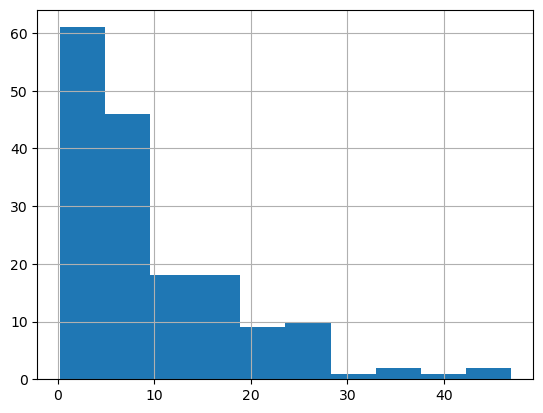

In [180]:
df_merge1['Bovine Meat Consumption'].hist()
plt.show()

#assimetria positiva à direita (transformação logaritmica)

In [181]:
#Transformação logaritmica
df_merge1['Bovine Meat Consumption'] = np.log(df_merge1['Bovine Meat Consumption'])

In [182]:
#código python teste de Shapiro-Wilk para avaliar se a distribuição dos dados é normal ou não
from scipy.stats import shapiro
import pandas as pd

# Selecionar a coluna a ser testada
coluna = df_merge1['Bovine Meat Consumption']

# Aplicar o teste de Shapiro-Wilk
stat, p = shapiro(coluna)

# Imprimir o resultado do teste
print('Estatística do teste de Shapiro-Wilk: %.3f, p-value: %.3f' % (stat, p))

#Note: O resultado do teste de Shapiro-Wilk é retornado como um valor de estatística do teste (stat) e um valor p (p). Se o valor p for menor que um nível de significância pré-definido (por exemplo, 0,05), pode-se rejeitar a hipótese nula de que os dados são normalmente distribuídos. Caso contrário, não há evidência suficiente para rejeitar a hipótese nula, o que sugere que a distribuição dos dados é normal.

Estatística do teste de Shapiro-Wilk: 0.981, p-value: 0.021


In [183]:
df_merge1['Bovine Meat Consumption'] = np.exp(df_merge1['Bovine Meat Consumption'])
#exponencial para reverter 

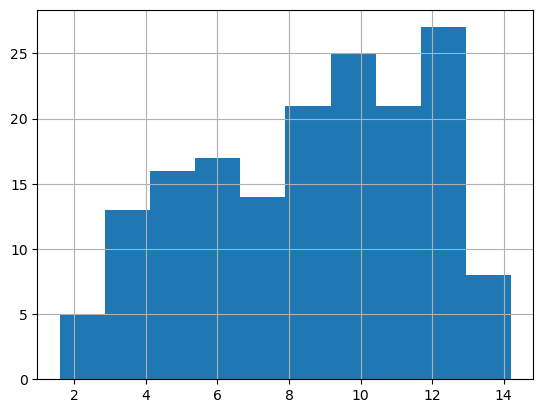

In [184]:
df_merge1['Mean years of schooling'].hist()
plt.show()

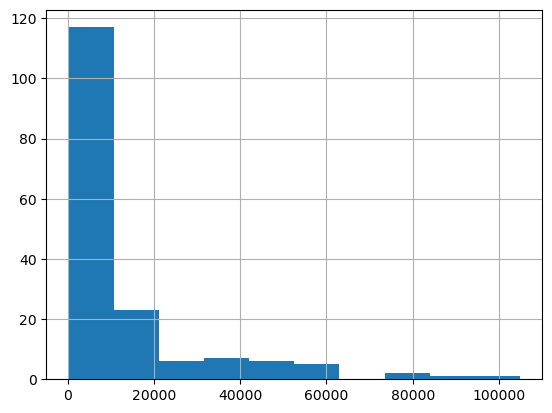

In [185]:
df_merge1['GDP_per_capita'].hist()
plt.show()

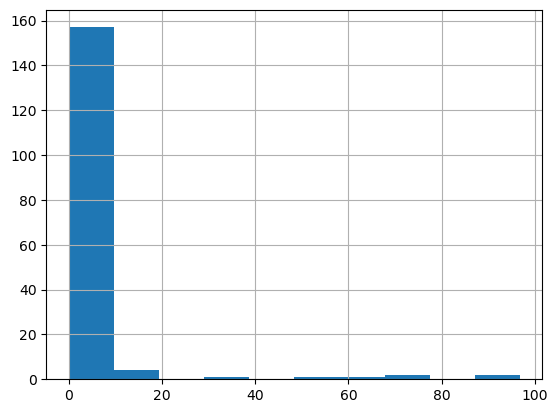

In [186]:
df_merge1['% of Buddhists'].hist()
plt.show()

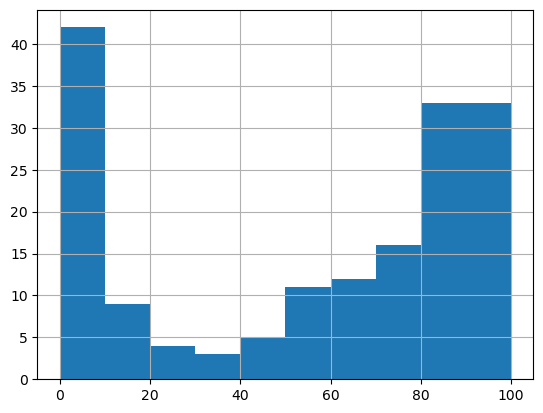

In [187]:
df_merge1['% of Christians'].hist()
plt.show()

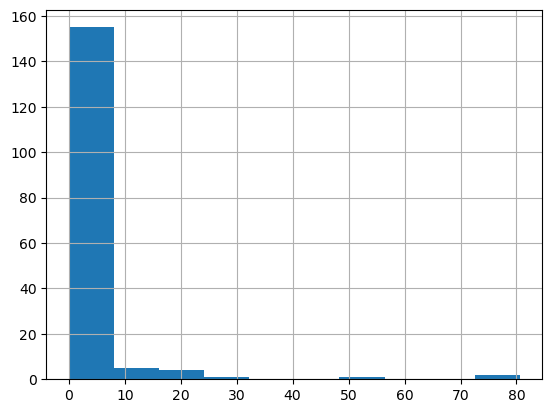

In [188]:
df_merge1['% of Hindus'].hist()
plt.show()

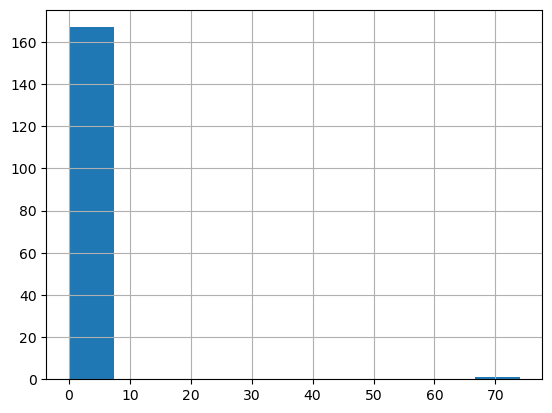

In [189]:
df_merge1['% of Jews'].hist()
plt.show()

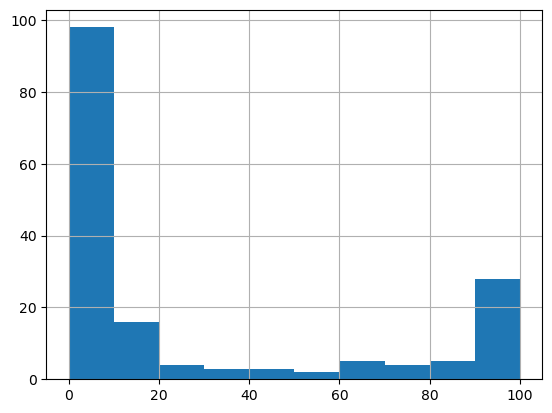

In [190]:
df_merge1['% of Muslims'].hist()
plt.show()

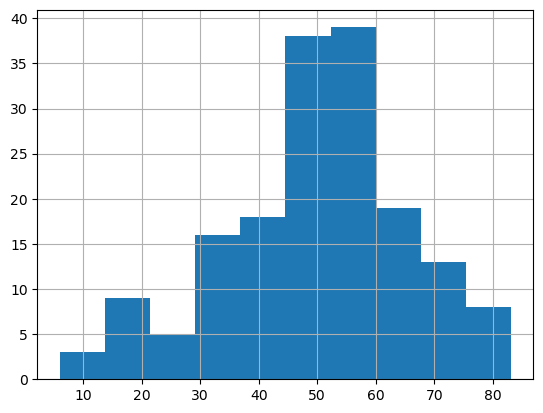

In [191]:
df_merge1['Female Labour force participation rate (%)'].hist()
plt.show()

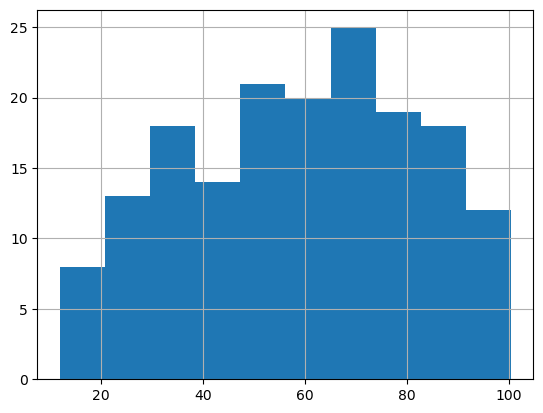

In [192]:
df_merge1['% urbanization'].hist()
plt.show()

In [193]:
df_merge1.describe()

,Bovine Meat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
count,168.000000,167.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,10.033155,8.589820,3.370238,54.651786,2.48750,0.463690,27.376786,49.713292,12308.581488,58.852381
std,8.931874,3.125693,14.579469,37.165859,10.25865,5.710159,37.792435,15.683000,18106.394638,22.461117
min,0.260000,1.600000,0.000000,0.000000,0.00000,0.000000,0.000000,6.081000,268.279324,12.000000
25%,3.595000,6.200000,0.000000,9.850000,0.00000,0.000000,0.000000,41.753751,1690.685705,40.750000
50%,7.050000,8.800000,0.000000,67.150000,0.00000,0.000000,5.750000,51.188000,4766.351792,58.500000
75%,14.502500,11.250000,0.000000,88.000000,0.00000,0.000000,56.625000,59.524500,13913.907555,76.475000
max,46.930000,14.200000,96.800000,100.000000,80.60000,74.000000,100.000000,83.051002,104840.412501,100.400000


C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\2498460936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = df_merge1.corr()


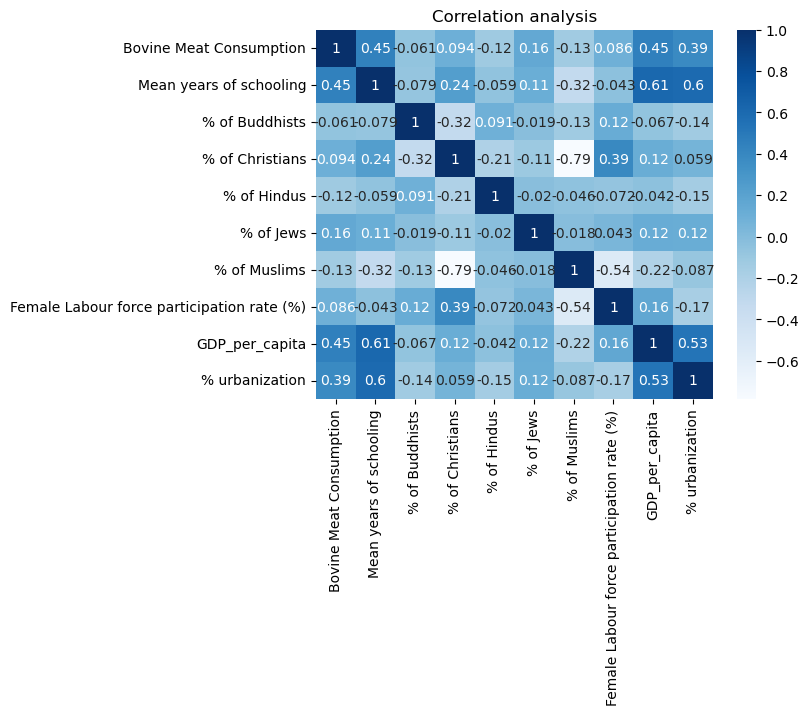

In [194]:
corr_mtx = df_merge1.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [195]:
# Dataframe 2 - Mutton_and_Goat_Meat_Consumption

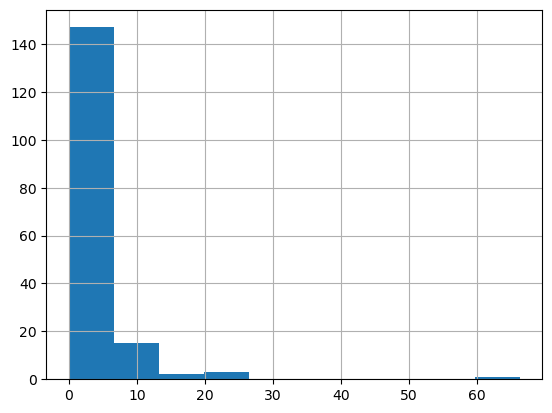

In [196]:
df_merge2['Mutton & Goat Meat Consumption'].hist()
plt.show()

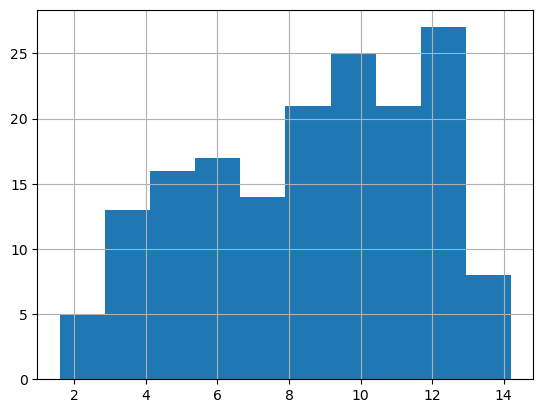

In [197]:
df_merge2['Mean years of schooling'].hist()
plt.show()

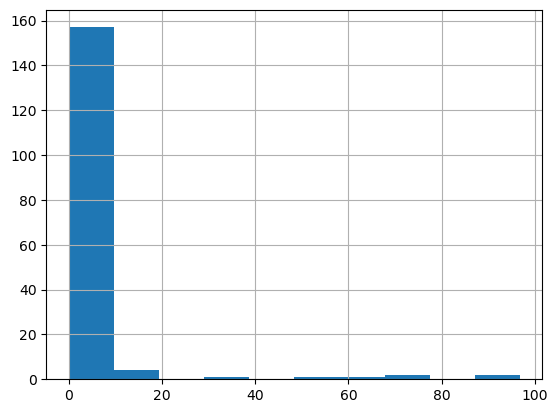

In [198]:
df_merge2['% of Buddhists'].hist()
plt.show()

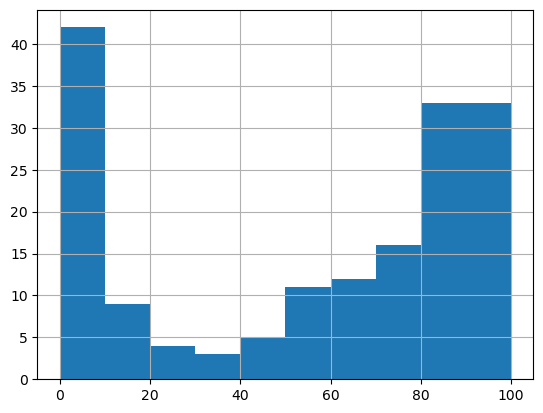

In [199]:
df_merge2['% of Christians'].hist()
plt.show()

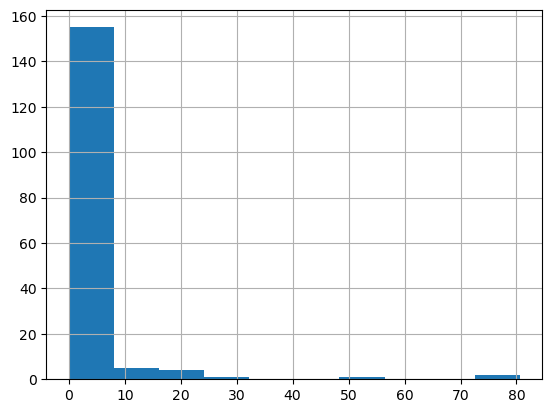

In [200]:
df_merge2['% of Hindus'].hist()
plt.show()

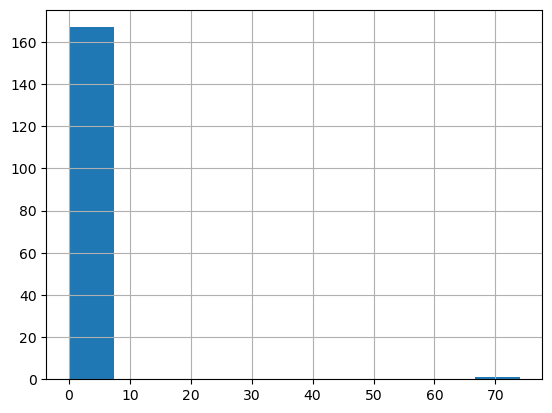

In [201]:
df_merge2['% of Jews'].hist()
plt.show()

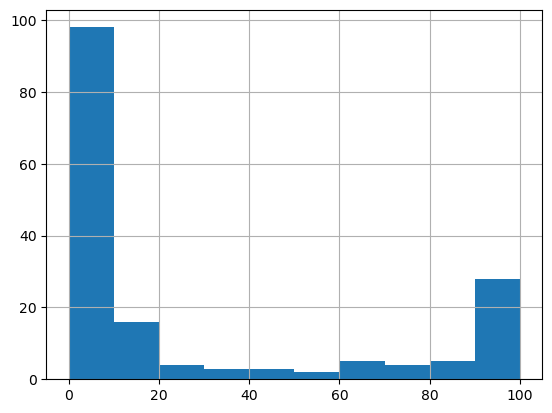

In [202]:
df_merge2['% of Muslims'].hist()
plt.show()

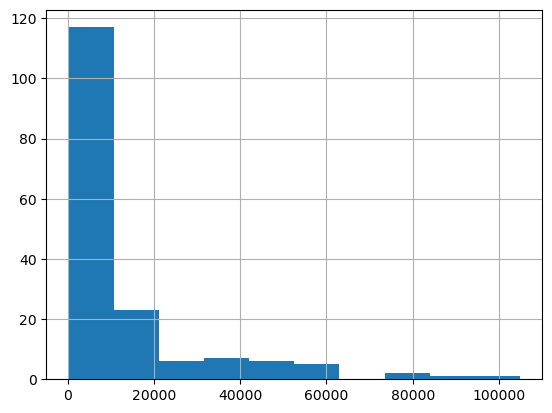

In [203]:
df_merge2['GDP_per_capita'].hist()
plt.show()

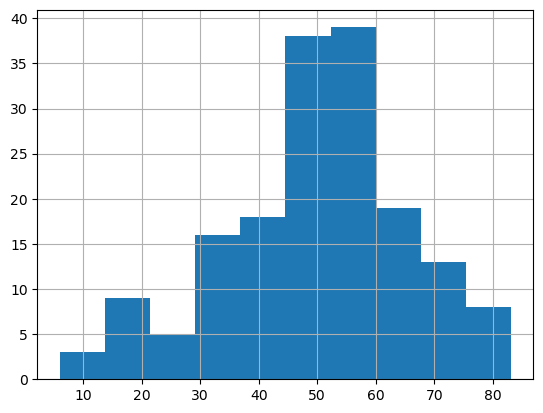

In [204]:
df_merge2['Female Labour force participation rate (%)'].hist()
plt.show()

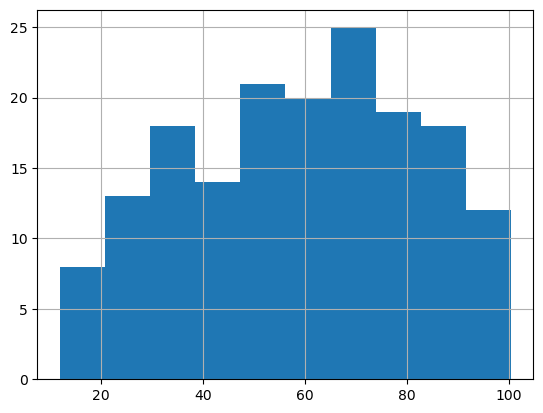

In [205]:
df_merge2['% urbanization'].hist()
plt.show()

In [206]:
df_merge2.describe()

,Mutton & Goat Meat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
count,168.000000,167.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3.134405,8.589820,3.370238,54.651786,2.48750,0.463690,27.376786,49.713292,12308.581488,58.852381
std,6.304645,3.125693,14.579469,37.165859,10.25865,5.710159,37.792435,15.683000,18106.394638,22.461117
min,0.010000,1.600000,0.000000,0.000000,0.00000,0.000000,0.000000,6.081000,268.279324,12.000000
25%,0.457500,6.200000,0.000000,9.850000,0.00000,0.000000,0.000000,41.753751,1690.685705,40.750000
50%,1.290000,8.800000,0.000000,67.150000,0.00000,0.000000,5.750000,51.188000,4766.351792,58.500000
75%,3.412500,11.250000,0.000000,88.000000,0.00000,0.000000,56.625000,59.524500,13913.907555,76.475000
max,66.330000,14.200000,96.800000,100.000000,80.60000,74.000000,100.000000,83.051002,104840.412501,100.400000


C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\3630209375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = df_merge2.corr()


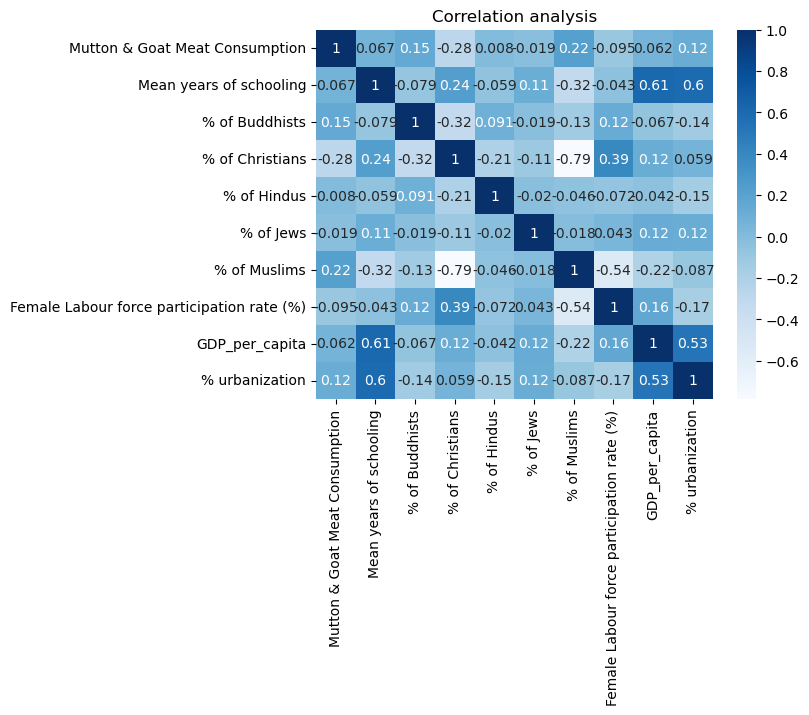

In [207]:
corr_mtx = df_merge2.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [208]:
# Dataframe 3 - Pigmeat_Consumption

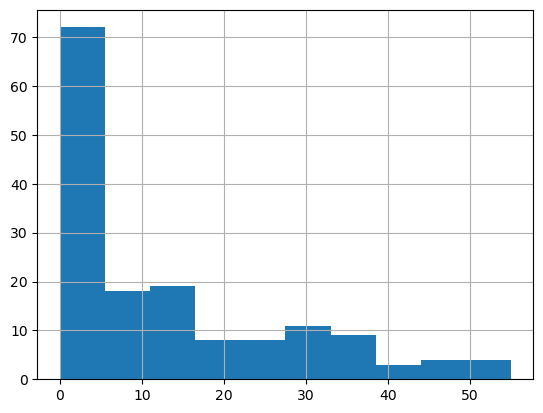

In [209]:
df_merge3['Pigmeat Consumption'].hist()

# save the plot as a PNG file
plt.savefig('Pigmeat consumption.png', dpi=300)

plt.show()

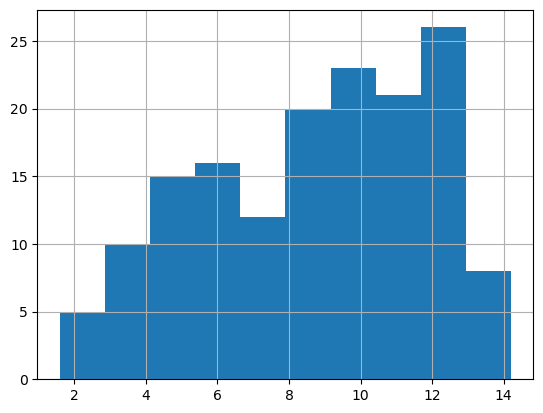

In [210]:
df_merge3['Mean years of schooling'].hist()

# save the plot as a PNG file
plt.savefig('Mean years of schooling.png', dpi=300)

plt.show()

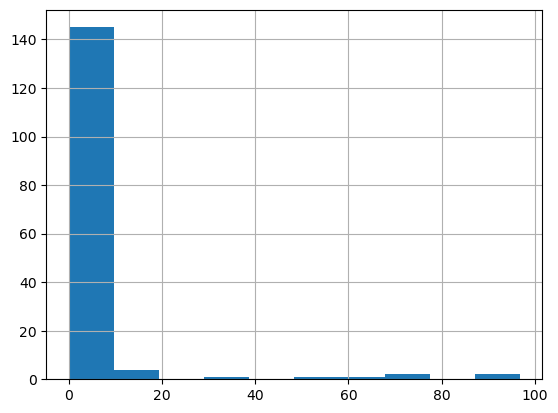

In [211]:
df_merge3['% of Buddhists'].hist()

# save the plot as a PNG file
plt.savefig('% of Buddhists.png', dpi=300)

plt.show()

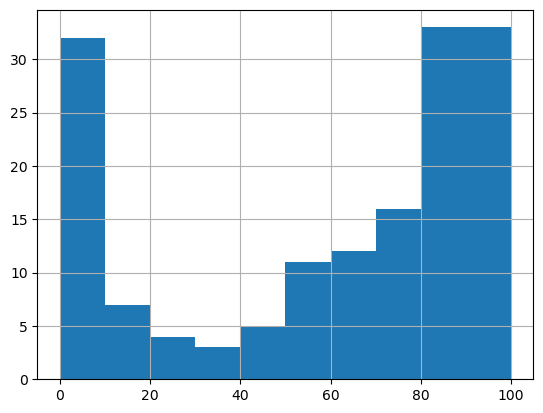

In [212]:
df_merge3['% of Christians'].hist()

# save the plot as a PNG file
plt.savefig('% of Christians.png', dpi=300)

plt.show()

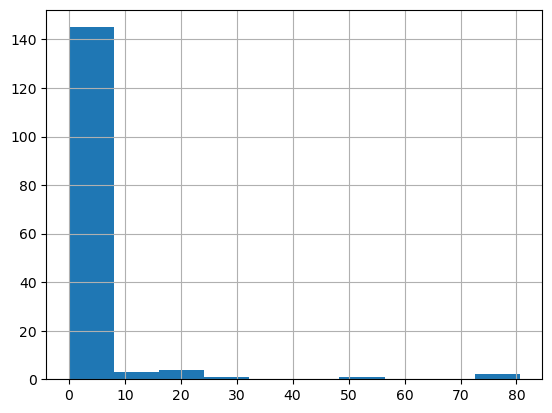

In [213]:
df_merge3['% of Hindus'].hist()

# save the plot as a PNG file
plt.savefig('% of Hindus.png', dpi=300)

plt.show()

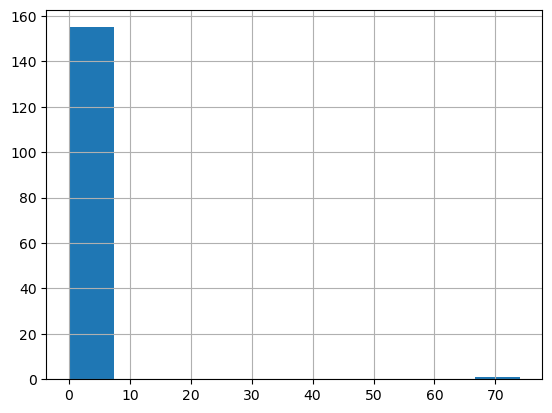

In [214]:
df_merge3['% of Jews'].hist()

# save the plot as a PNG file
plt.savefig('% of Jews.png', dpi=300)

plt.show()

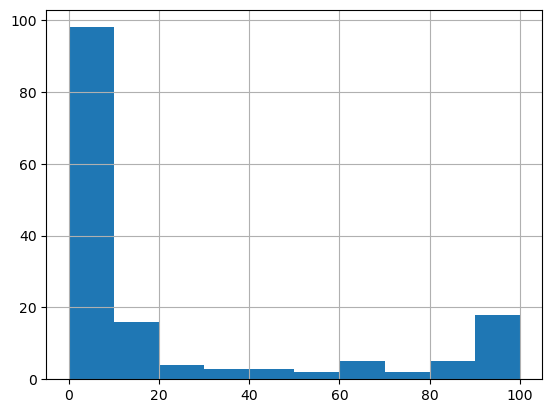

In [215]:
df_merge3['% of Muslims'].hist()

# save the plot as a PNG file
plt.savefig('% of Muslims.png', dpi=300)

plt.show()

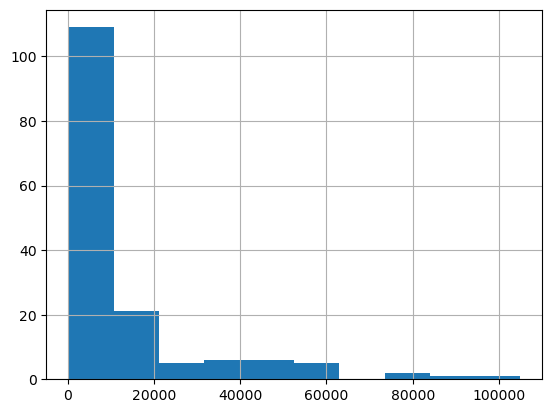

In [216]:
df_merge3['GDP_per_capita'].hist()

# save the plot as a PNG file
plt.savefig('GDP_per_capita.png', dpi=300)

plt.show()

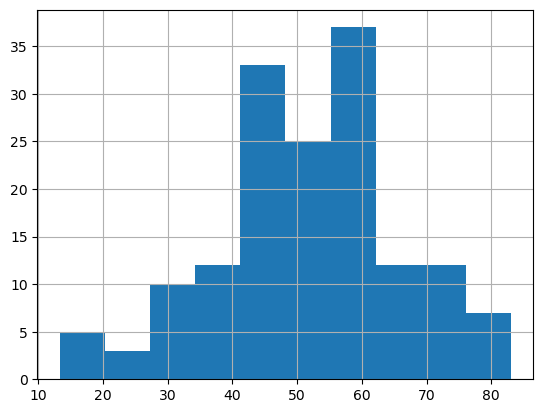

In [217]:
df_merge3['Female Labour force participation rate (%)'].hist()

# save the plot as a PNG file
plt.savefig('Female Labour force participation rate (%).png', dpi=300)

plt.show()

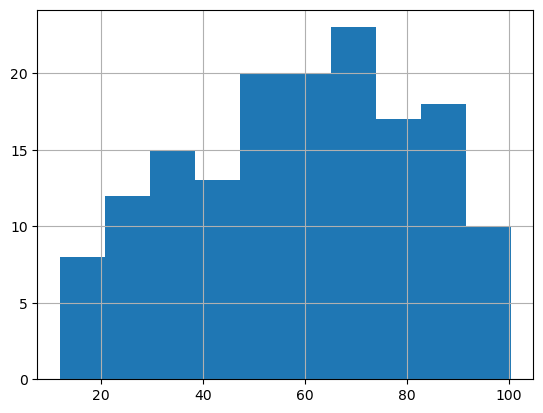

In [218]:
df_merge3['% urbanization'].hist()

# save the plot as a PNG file
plt.savefig('% urbanization.png', dpi=300)

plt.show()

In [104]:
df_merge3.describe()

,Pigmeat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,13.157244,8.702564,3.579487,58.579487,2.492949,0.499359,22.385256,51.610500,12548.019535,58.839103
std,14.419273,3.117504,15.106545,35.624418,10.599830,5.925565,34.364956,14.209165,18482.294373,22.307426
min,0.010000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,13.332000,268.279324,12.000000
25%,1.010000,6.375000,0.000000,20.025000,0.000000,0.000000,0.000000,43.365002,1870.524853,41.975000
50%,7.370000,9.050000,0.000000,72.600000,0.000000,0.000000,4.900000,52.882000,4880.860705,58.500000
75%,21.862500,11.300000,0.000000,88.400000,0.000000,0.000000,24.700000,60.173000,13913.907555,76.475000
max,54.950000,14.200000,96.800000,100.000000,80.600000,74.000000,100.000000,83.051002,104840.412501,100.400000


C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_23800\537105477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = df_merge3.corr()


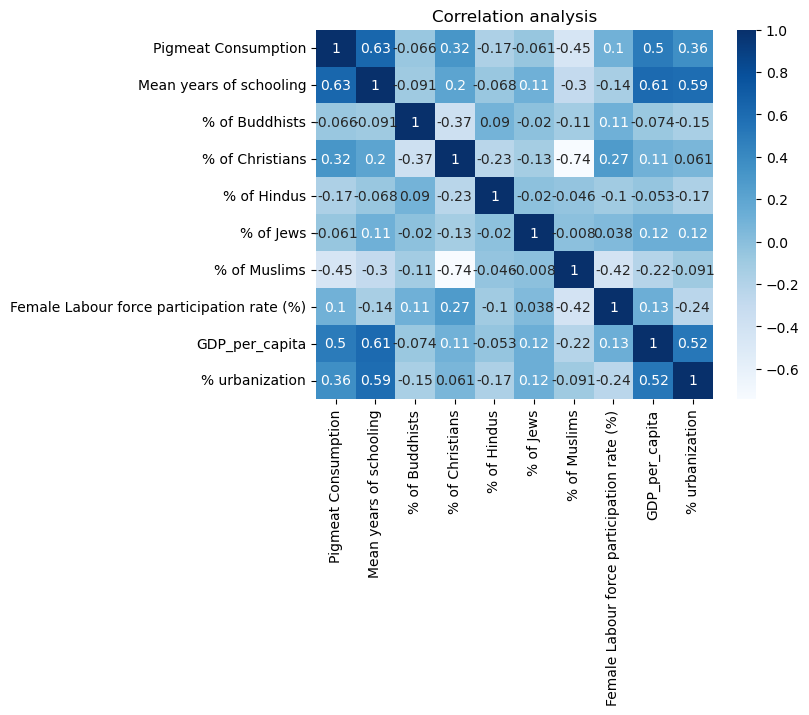

In [105]:
corr_mtx = df_merge3.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [105]:
# Dataframe 4 - Poultry_Meat_Consumption

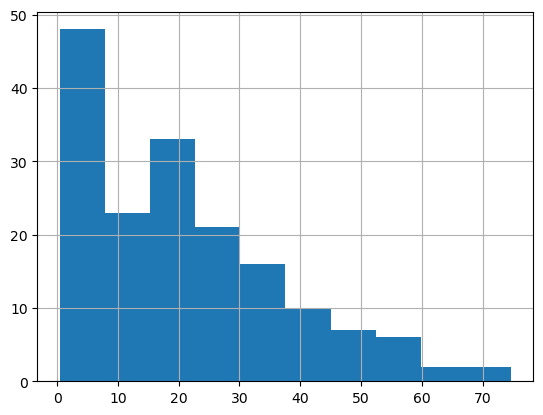

In [106]:
df_merge4['Poultry Meat Consumption'].hist()
plt.show()

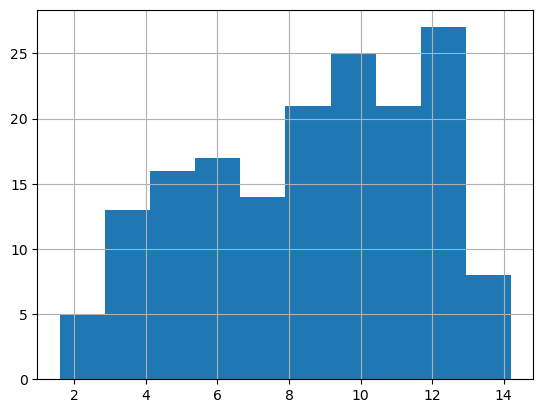

In [107]:
df_merge4['Mean years of schooling'].hist()
plt.show()

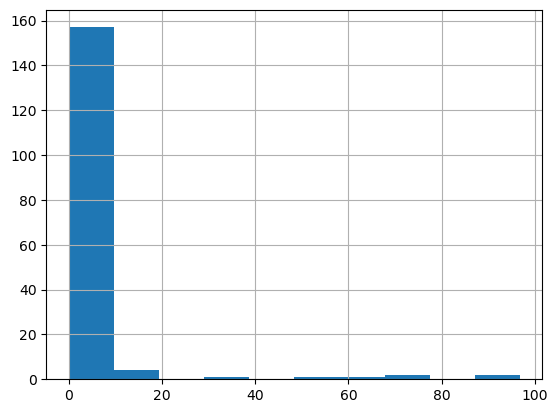

In [108]:
df_merge4['% of Buddhists'].hist()
plt.show()

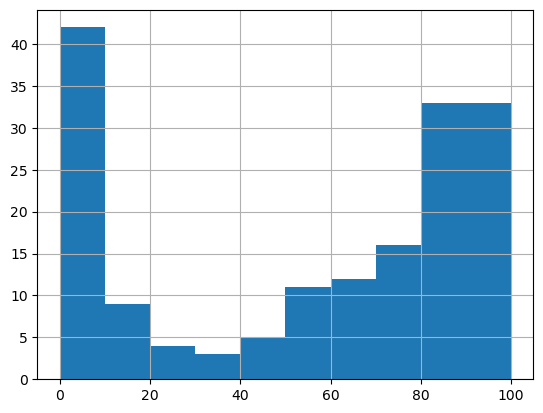

In [109]:
df_merge4['% of Christians'].hist()
plt.show()

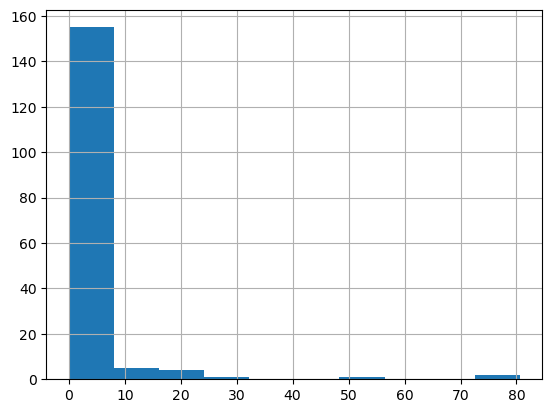

In [110]:
df_merge4['% of Hindus'].hist()
plt.show()

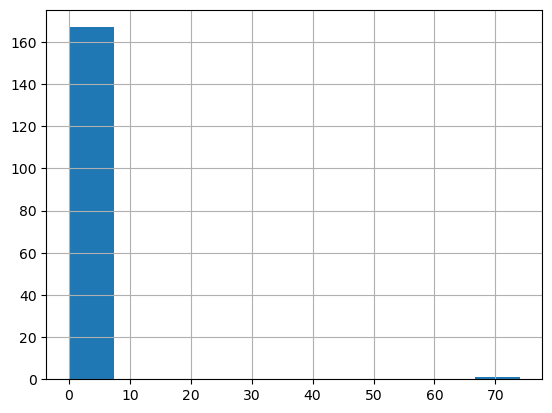

In [111]:
df_merge4['% of Jews'].hist()
plt.show()

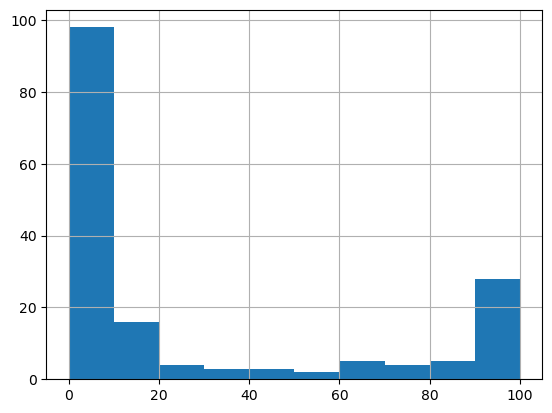

In [112]:
df_merge4['% of Muslims'].hist()
plt.show()

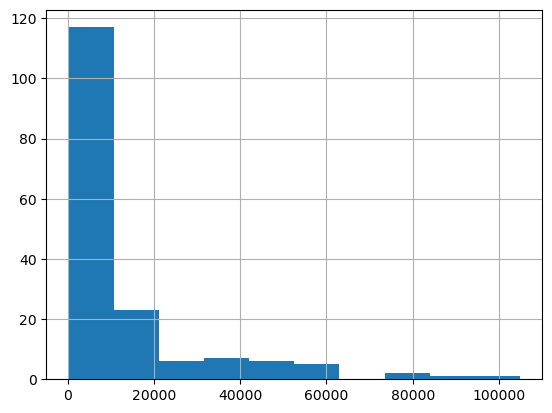

In [113]:
df_merge4['GDP_per_capita'].hist()
plt.show()

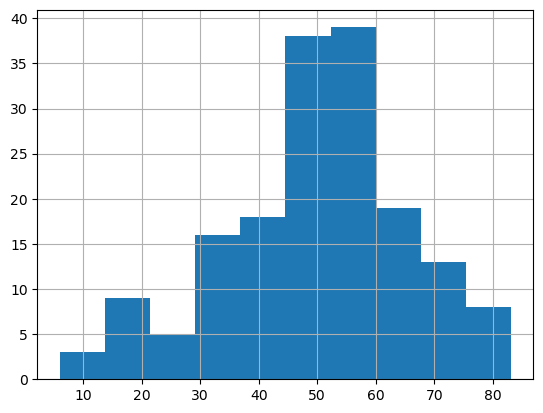

In [114]:
df_merge4['Female Labour force participation rate (%)'].hist()
plt.show()

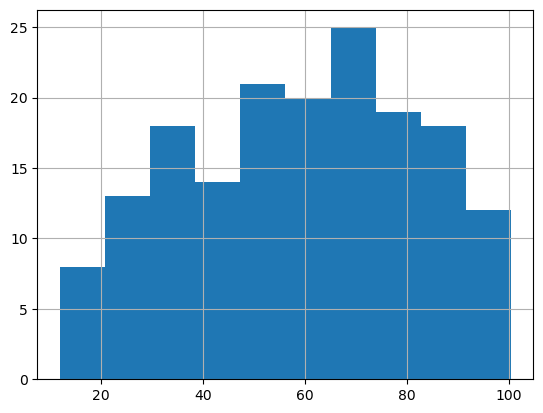

In [115]:
df_merge4['% urbanization'].hist()
plt.show()

In [116]:
df_merge4.describe()

,Poultry Meat Consumption,Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
count,168.000000,167.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,20.692619,8.589820,3.370238,54.651786,2.48750,0.463690,27.376786,49.713292,12308.581488,58.852381
std,16.556414,3.125693,14.579469,37.165859,10.25865,5.710159,37.792435,15.683000,18106.394638,22.461117
min,0.480000,1.600000,0.000000,0.000000,0.00000,0.000000,0.000000,6.081000,268.279324,12.000000
25%,6.255000,6.200000,0.000000,9.850000,0.00000,0.000000,0.000000,41.753751,1690.685705,40.750000
50%,17.985000,8.800000,0.000000,67.150000,0.00000,0.000000,5.750000,51.188000,4766.351792,58.500000
75%,30.412500,11.250000,0.000000,88.000000,0.00000,0.000000,56.625000,59.524500,13913.907555,76.475000
max,74.650000,14.200000,96.800000,100.000000,80.60000,74.000000,100.000000,83.051002,104840.412501,100.400000


C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_14644\1002167103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = df_merge4.corr()


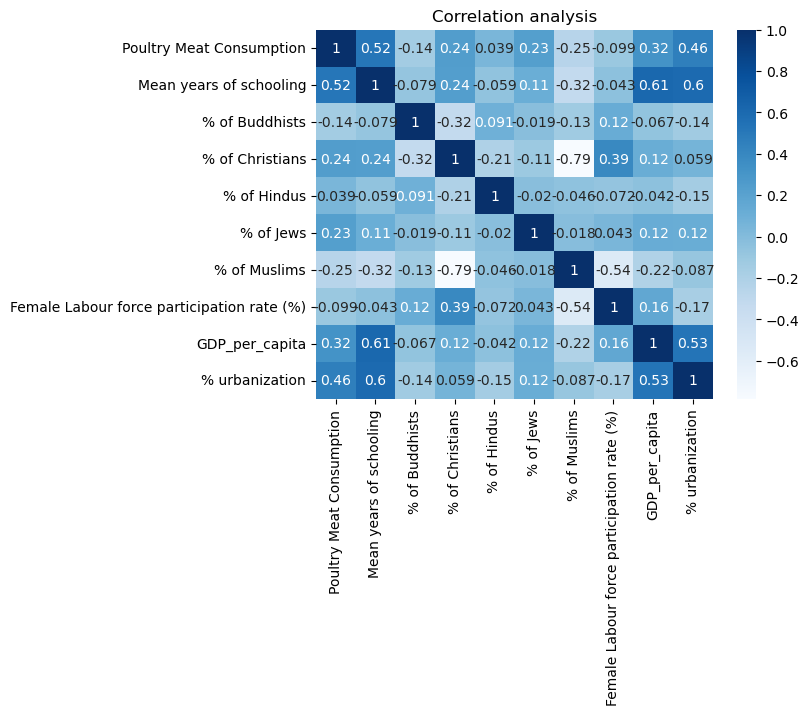

In [117]:
corr_mtx = df_merge4.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [118]:
# Dataframe 5 - Meat_Other_Consumption

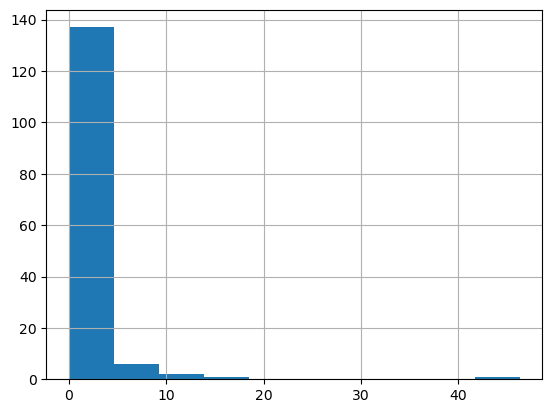

In [119]:
df_merge5['Meat, Other Consumption'].hist()
plt.show()

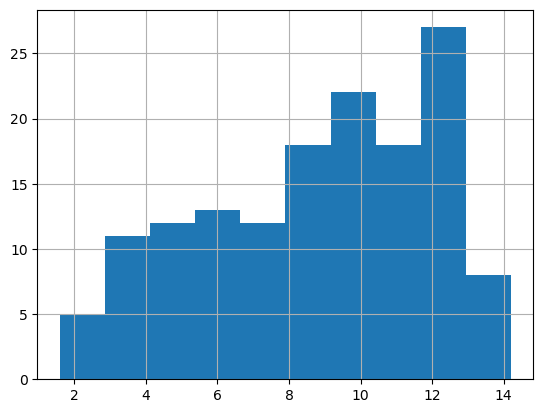

In [120]:
df_merge5['Mean years of schooling'].hist()
plt.show()

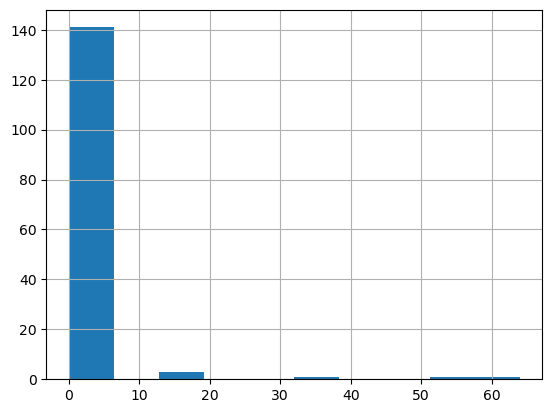

In [121]:
df_merge5['% of Buddhists'].hist()
plt.show()

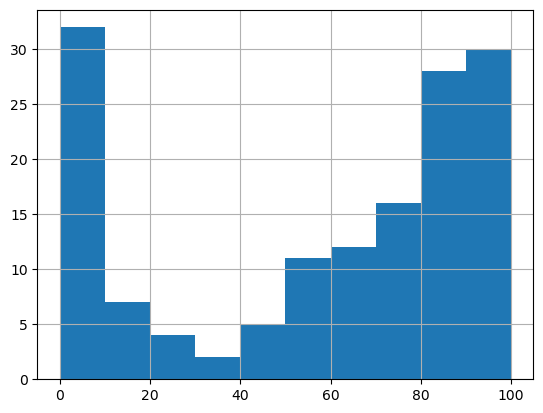

In [122]:
df_merge5['% of Christians'].hist()
plt.show()

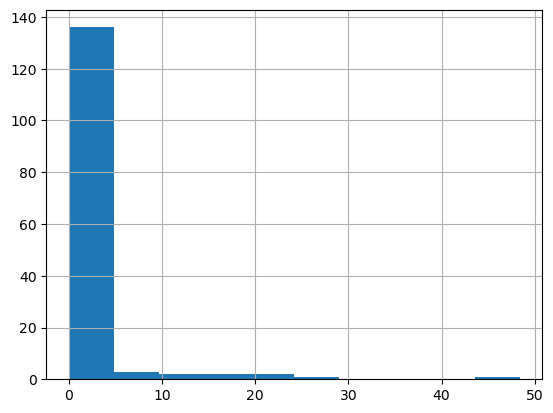

In [123]:
df_merge5['% of Hindus'].hist()
plt.show()

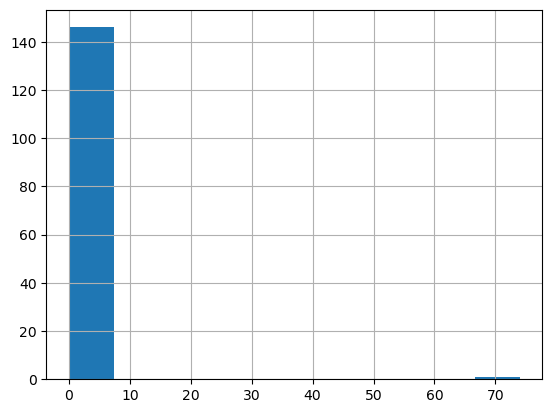

In [124]:
df_merge5['% of Jews'].hist()
plt.show()

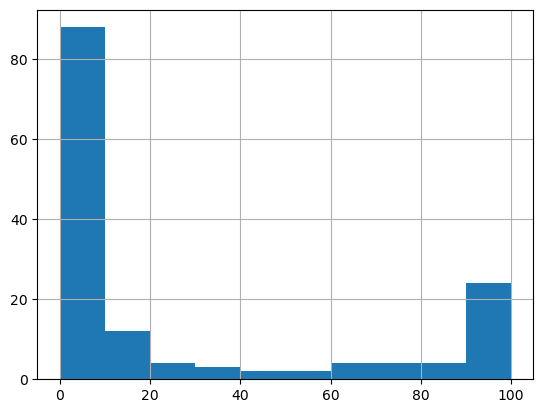

In [125]:
df_merge5['% of Muslims'].hist()
plt.show()

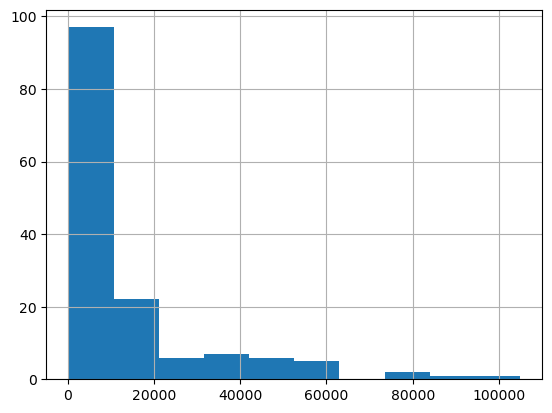

In [126]:
df_merge5['GDP_per_capita'].hist()
plt.show()

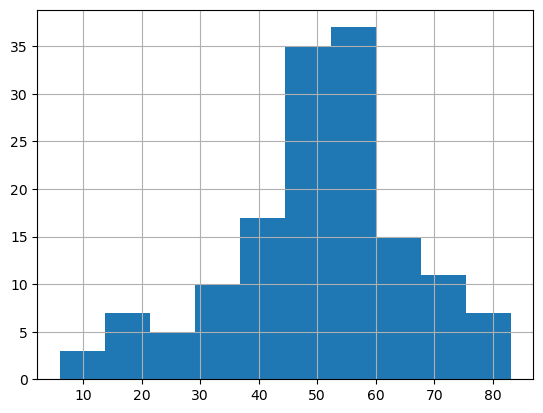

In [127]:
df_merge5['Female Labour force participation rate (%)'].hist()
plt.show()

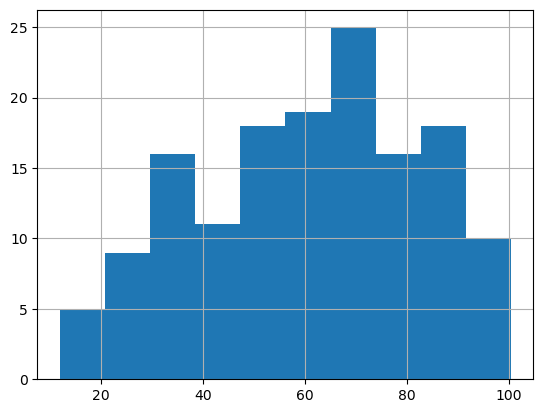

In [128]:
df_merge5['% urbanization'].hist()
plt.show()

In [129]:
df_merge5.describe()

,"Meat, Other Consumption",Mean years of schooling,% of Buddhists,% of Christians,% of Hindus,% of Jews,% of Muslims,Female Labour force participation rate (%),GDP_per_capita,% urbanization
count,147.000000,146.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,1.595306,8.767808,1.520408,56.984354,1.455782,0.529932,26.997959,49.863796,13561.994039,60.492517
std,4.343422,3.186219,7.734923,36.035131,5.745935,6.104135,37.772073,15.507840,19004.351637,21.614658
min,0.010000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,6.081000,268.279324,12.000000
25%,0.150000,6.425000,0.000000,13.650000,0.000000,0.000000,0.000000,42.337500,2110.344094,44.000000
50%,0.620000,9.250000,0.000000,70.000000,0.000000,0.000000,5.600000,51.521999,5306.683071,62.900000
75%,1.265000,11.475000,0.000000,88.050000,0.000000,0.000000,53.100000,58.399500,16080.966888,78.000000
max,46.310000,14.200000,64.000000,100.000000,48.400000,74.000000,100.000000,83.051002,104840.412501,100.400000


C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_14644\1674578242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = df_merge5.corr()


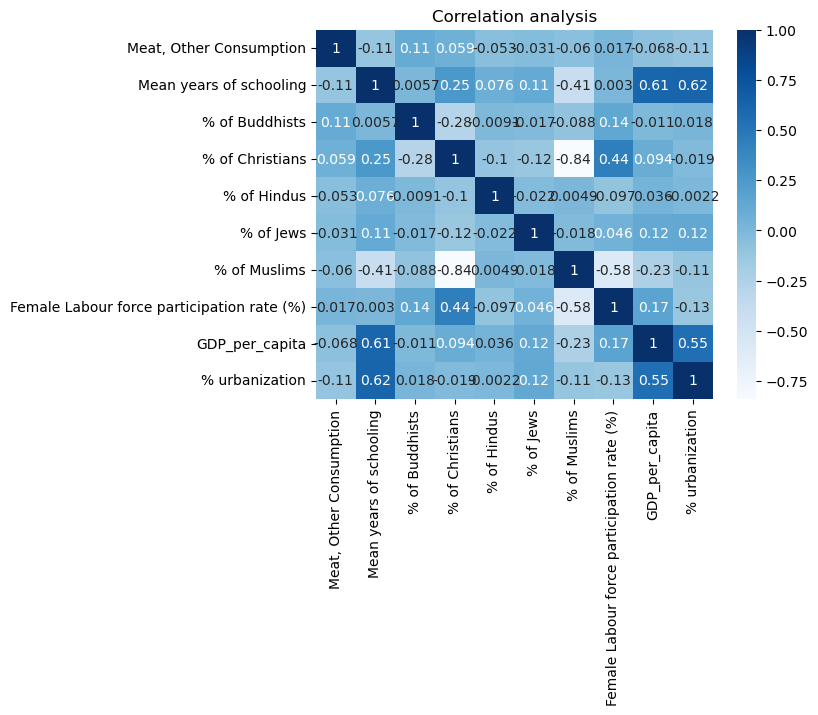

In [130]:
corr_mtx = df_merge5.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [131]:
df_merge1.isna().sum()

Country                                       0
Bovine Meat Consumption                       0
Mean years of schooling                       1
% of Buddhists                                0
% of Christians                               0
% of Hindus                                   0
% of Jews                                     0
% of Muslims                                  0
Female Labour force participation rate (%)    0
GDP_per_capita                                0
% urbanization                                0
dtype: int64

In [132]:
df_merge2.isna().sum()

Country                                       0
Mutton & Goat Meat Consumption                0
Mean years of schooling                       1
% of Buddhists                                0
% of Christians                               0
% of Hindus                                   0
% of Jews                                     0
% of Muslims                                  0
Female Labour force participation rate (%)    0
GDP_per_capita                                0
% urbanization                                0
dtype: int64

In [133]:
df_merge3.isna().sum()

Country                                       0
Pigmeat Consumption                           0
Mean years of schooling                       0
% of Buddhists                                0
% of Christians                               0
% of Hindus                                   0
% of Jews                                     0
% of Muslims                                  0
Female Labour force participation rate (%)    0
GDP_per_capita                                0
% urbanization                                0
dtype: int64

In [134]:
df_merge4.isna().sum()

Country                                       0
Poultry Meat Consumption                      0
Mean years of schooling                       1
% of Buddhists                                0
% of Christians                               0
% of Hindus                                   0
% of Jews                                     0
% of Muslims                                  0
Female Labour force participation rate (%)    0
GDP_per_capita                                0
% urbanization                                0
dtype: int64

In [135]:
df_merge5.isna().sum()

Country                                       0
Meat, Other Consumption                       0
Mean years of schooling                       1
% of Buddhists                                0
% of Christians                               0
% of Hindus                                   0
% of Jews                                     0
% of Muslims                                  0
Female Labour force participation rate (%)    0
GDP_per_capita                                0
% urbanization                                0
dtype: int64

In [136]:
df_merge1=df_merge1.dropna()
df_merge2=df_merge2.dropna()
df_merge3=df_merge3.dropna()
df_merge4=df_merge4.dropna()
df_merge5=df_merge5.dropna()

### Análises Robustas
+ As análises robustas são projetadas para serem mais resistentes a violações dos pressupostos tradicionais de regressão, como normalidade, homogeneidade e ausência de multicolinearidade. No entanto, isso não significa que as análises robustas possam ignorar completamente esses pressupostos.

+ WLS robusta pode ser abordagem útil quando os dados apresentam heteroscedasticidade e suposições da regressão linear são violadas.
+ O método de M-estimativa é útil quando há uma contaminação moderada ou pequena de outliers nos dados, enquanto o estimador de Huber é mais adequado para dados com contaminação moderada a alta de outliers.

Teste White para avaliar a existência de Heterocedasticidade

In [137]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diag

# Definir as variáveis independentes (X) e dependentes (Y)
X = df_merge1[['Mean years of schooling', '% of Buddhists', '% of Christians', '% of Hindus', '% of Jews', '% of Muslims', 'Female Labour force participation rate (%)', 'GDP_per_capita', '% urbanization']]
Y = df_merge1['Bovine Meat Consumption']

# Ajustar um modelo de regressão usando a biblioteca statsmodels
model = smf.ols('Y ~ X', data=df_merge1).fit()

# Realizar o teste de White
white_test = sm_diag.het_white(model.resid, model.model.exog)

# Imprimir os resultados do teste
print('Estatística do teste de White:', white_test[0])
print('Valor p do teste de White:', white_test[1])
print('Valor crítico do teste de White:', white_test[3])

####Presença de homocedasticidade

Estatística do teste de White: 30.401791444574712
Valor p do teste de White: 0.977721404864409
Valor crítico do teste de White: 0.9902242819827378


In [138]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diag

# Definir as variáveis independentes (X) e dependentes (Y)
X = df_merge2[['Mean years of schooling', '% of Buddhists', '% of Christians', '% of Hindus', '% of Jews', '% of Muslims', 'Female Labour force participation rate (%)', 'GDP_per_capita', '% urbanization']]
Y = df_merge2['Mutton & Goat Meat Consumption'] 

# Ajustar um modelo de regressão usando a biblioteca statsmodels
model = smf.ols('Y ~ X', data=df_merge2).fit()

# Realizar o teste de White
white_test = sm_diag.het_white(model.resid, model.model.exog)

# Imprimir os resultados do teste
print('Estatística do teste de White:', white_test[0])
print('Valor p do teste de White:', white_test[1])
print('Valor crítico do teste de White:', white_test[3])

###Presença de heterocedasticidade

Estatística do teste de White: 151.84705592882761
Valor p do teste de White: 1.0383511867740254e-12
Valor crítico do teste de White: 4.99260960062273e-43


In [139]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diag

# Define as independent (X) and dependent (Y) variables
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians', '% of Hindus', '% of Jews', '% of Muslims', 'Female Labour force participation rate (%)', 'GDP_per_capita', '% urbanization']]
Y = df_merge3['Pigmeat Consumption'] 

# Fit a regression model using the statsmodels library
model = smf.ols('Y ~ X', data=df_merge3).fit()

# Perform White's test
white_test = sm_diag.het_white(model.resid, model.model.exog)

# Print test results
print('White Test Statistics:', white_test[0])
print('White test p-value:', white_test[1])
print('White test critical value:', white_test[3])

####Alguma heterocedasticidade nos dados

Estatística do teste de White: 54.77497861195796
Valor p do teste de White: 0.2330860924936047
Valor crítico do teste de White: 0.21171109588937995


In [220]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diag

# Define as independent (X) and dependent (Y) variables
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians', '% of Hindus', '% of Jews', '% of Muslims', 'Female Labour force participation rate (%)', 'GDP_per_capita', '% urbanization']]
Y = df_merge3['Pigmeat Consumption'] 

# Fit a regression model using the statsmodels library
model = smf.ols('Y ~ X', data=df_merge3).fit()

# Perform White's test
white_test = sm_diag.het_white(model.resid, model.model.exog)

# Print test results
print('White Test Statistics:', white_test[0])
print('White test p-value:', white_test[1])
print('White test critical value:', white_test[3])

White Test Statistics: 54.77497861195796
White test p-value: 0.2330860924936047
White test critical value: 0.21171109588937995


In [140]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diag

# Definir as variáveis independentes (X) e dependentes (Y)
X = df_merge4[['Mean years of schooling', '% of Buddhists', '% of Christians', '% of Hindus', '% of Jews', '% of Muslims', 'Female Labour force participation rate (%)', 'GDP_per_capita', '% urbanization']]
Y = df_merge4['Poultry Meat Consumption'] 

# Ajustar um modelo de regressão usando a biblioteca statsmodels
model = smf.ols('Y ~ X', data=df_merge4).fit()

# Realizar o teste de White
white_test = sm_diag.het_white(model.resid, model.model.exog)

# Imprimir os resultados do teste
print('Estatística do teste de White:', white_test[0])
print('Valor p do teste de White:', white_test[1])
print('Valor crítico do teste de White:', white_test[3])

###Presença de heterocedasticidade

Estatística do teste de White: 65.20086468440036
Valor p do teste de White: 0.049741837676740654
Valor crítico do teste de White: 0.02516872755771231


In [141]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diag

# Definir as variáveis independentes (X) e dependentes (Y)
X = df_merge5[['Mean years of schooling', '% of Buddhists', '% of Christians', '% of Hindus', '% of Jews', '% of Muslims', 'Female Labour force participation rate (%)', 'GDP_per_capita', '% urbanization']]
Y = df_merge5['Meat, Other Consumption'] 

# Ajustar um modelo de regressão usando a biblioteca statsmodels
model = smf.ols('Y ~ X', data=df_merge5).fit()

# Realizar o teste de White
white_test = sm_diag.het_white(model.resid, model.model.exog)

# Imprimir os resultados do teste
print('Estatística do teste de White:', white_test[0])
print('Valor p do teste de White:', white_test[1])
print('Valor crítico do teste de White:', white_test[3])

###Presença de heterocedasticidade

Estatística do teste de White: 66.92808248086959
Valor p do teste de White: 0.03672105703016341
Valor crítico do teste de White: 0.013031352250035504


1. Bovine Meat Consumption

In [142]:
import statsmodels.api as sm 
import numpy as np 
import pandas as pd 
# Ler dados data = pd.read_csv('seu_arquivo.csv') 
# Definir variáveis explicativas (X) e dependente (Y) 
X = df_merge1[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge1['Bovine Meat Consumption'] 
# M-estimators 
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight()) 
results_m = model_m.fit() 
# Estimadores de Huber 
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT()) 
results_h = model_h.fit() 
# Imprimir resultados 
print(results_m.summary()) 
print(results_h.summary())

                       Robust linear Model Regression Results                      
Dep. Variable:     Bovine Meat Consumption   No. Observations:                  167
Model:                                 RLM   Df Residuals:                      158
Method:                               IRLS   Df Model:                            8
Norm:                        TukeyBiweight                                         
Scale Est.:                            mad                                         
Cov Type:                               H1                                         
Date:                     Thu, 09 Mar 2023                                         
Time:                             14:08:40                                         
No. Iterations:                         41                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [143]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Definir variáveis explicativas (X) e dependente (Y)
X = df_merge1[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge1['Bovine Meat Consumption'] 
# M-estimators
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight())
results_m = model_m.fit()

# Estimadores de Huber
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_h = model_h.fit()

# Ajustar modelos usando LinearRegression
reg_m = LinearRegression().fit(X, Y)
reg_h = LinearRegression().fit(X, Y)

# Calcular R² manualmente
r2_m = r2_score(Y, reg_m.predict(X))
r2_h = r2_score(Y, reg_h.predict(X))

# Imprimir resultados
print(results_m.summary())
print("R² para o modelo M-estimators:", r2_m)
print(results_h.summary())
print("R² para o modelo estimadores de Huber:", r2_h)


                       Robust linear Model Regression Results                      
Dep. Variable:     Bovine Meat Consumption   No. Observations:                  167
Model:                                 RLM   Df Residuals:                      158
Method:                               IRLS   Df Model:                            8
Norm:                        TukeyBiweight                                         
Scale Est.:                            mad                                         
Cov Type:                               H1                                         
Date:                     Thu, 09 Mar 2023                                         
Time:                             14:08:42                                         
No. Iterations:                         41                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

2. Mutton & Goat Meat Consumption

In [144]:
import statsmodels.api as sm 
import numpy as np 
import pandas as pd 
# Ler dados data = pd.read_csv('seu_arquivo.csv') 
# Definir variáveis explicativas (X) e dependente (Y) 
X = df_merge2[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge2['Mutton & Goat Meat Consumption'] 
# M-estimators 
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight()) 
results_m = model_m.fit() 
# Estimadores de Huber 
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT()) 
results_h = model_h.fit() 
# Imprimir resultados 
print(results_m.summary()) 
print(results_h.summary())

                          Robust linear Model Regression Results                          
Dep. Variable:     Mutton & Goat Meat Consumption   No. Observations:                  167
Model:                                        RLM   Df Residuals:                      158
Method:                                      IRLS   Df Model:                            8
Norm:                               TukeyBiweight                                         
Scale Est.:                                   mad                                         
Cov Type:                                      H1                                         
Date:                            Thu, 09 Mar 2023                                         
Time:                                    14:08:42                                         
No. Iterations:                                50                                         
                                                 coef    std err          z      P>|z|    

In [145]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Definir variáveis explicativas (X) e dependente (Y)
X = df_merge2[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge2['Mutton & Goat Meat Consumption'] 
# M-estimators
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight())
results_m = model_m.fit()

# Estimadores de Huber
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_h = model_h.fit()

# Ajustar modelos usando LinearRegression
reg_m = LinearRegression().fit(X, Y)
reg_h = LinearRegression().fit(X, Y)

# Calcular R² manualmente
r2_m = r2_score(Y, reg_m.predict(X))
r2_h = r2_score(Y, reg_h.predict(X))

# Imprimir resultados
print(results_m.summary())
print("R² para o modelo M-estimators:", r2_m)
print(results_h.summary())
print("R² para o modelo estimadores de Huber:", r2_h)

                          Robust linear Model Regression Results                          
Dep. Variable:     Mutton & Goat Meat Consumption   No. Observations:                  167
Model:                                        RLM   Df Residuals:                      158
Method:                                      IRLS   Df Model:                            8
Norm:                               TukeyBiweight                                         
Scale Est.:                                   mad                                         
Cov Type:                                      H1                                         
Date:                            Thu, 09 Mar 2023                                         
Time:                                    14:08:42                                         
No. Iterations:                                50                                         
                                                 coef    std err          z      P>|z|    

3. Pigmeat Consumption

In [146]:
import statsmodels.api as sm 
import numpy as np 
import pandas as pd 
# Ler dados data = pd.read_csv('seu_arquivo.csv') 
# Definir variáveis explicativas (X) e dependente (Y) 
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge3['Pigmeat Consumption'] 
# M-estimators 
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight()) 
results_m = model_m.fit() 
# Estimadores de Huber 
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT()) 
results_h = model_h.fit() 
# Imprimir resultados 
print(results_m.summary()) 
print(results_h.summary())

                     Robust linear Model Regression Results                    
Dep. Variable:     Pigmeat Consumption   No. Observations:                  156
Model:                             RLM   Df Residuals:                      147
Method:                           IRLS   Df Model:                            8
Norm:                    TukeyBiweight                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Thu, 09 Mar 2023                                         
Time:                         14:08:42                                         
No. Iterations:                     50                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [147]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Definir variáveis explicativas (X) e dependente (Y)
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge3['Pigmeat Consumption'] 
# M-estimators
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight())
results_m = model_m.fit()

# Estimadores de Huber
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_h = model_h.fit()

# Ajustar modelos usando LinearRegression
reg_m = LinearRegression().fit(X, Y)
reg_h = LinearRegression().fit(X, Y)

# Calcular R² manualmente
r2_m = r2_score(Y, reg_m.predict(X))
r2_h = r2_score(Y, reg_h.predict(X))

# Imprimir resultados
print(results_m.summary())
print("R² para o modelo M-estimators:", r2_m)
print(results_h.summary())
print("R² para o modelo estimadores de Huber:", r2_h)


                     Robust linear Model Regression Results                    
Dep. Variable:     Pigmeat Consumption   No. Observations:                  156
Model:                             RLM   Df Residuals:                      147
Method:                           IRLS   Df Model:                            8
Norm:                    TukeyBiweight                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Thu, 09 Mar 2023                                         
Time:                         14:08:42                                         
No. Iterations:                     50                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [159]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Definir variáveis explicativas (X) e dependente (Y)
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge3['Pigmeat Consumption'] 

# Estimadores de Huber
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_h = model_h.fit()

# Ajustar modelo usando LinearRegression
reg_h = LinearRegression().fit(X, Y)

# Calcular R² manualmente
r2_h = r2_score(Y, reg_h.predict(X))

# Imprimir resultados
print(results_h.summary())
print("R² for the Huber estimator's model:", r2_h)

                     Robust linear Model Regression Results                    
Dep. Variable:     Pigmeat Consumption   No. Observations:                  156
Model:                             RLM   Df Residuals:                      147
Method:                           IRLS   Df Model:                            8
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Thu, 09 Mar 2023                                         
Time:                         14:34:54                                         
No. Iterations:                     18                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

4. Poultry Meat Consumption

In [148]:
import statsmodels.api as sm 
import numpy as np 
import pandas as pd 
# Ler dados data = pd.read_csv('seu_arquivo.csv') 
# Definir variáveis explicativas (X) e dependente (Y) 
X = df_merge4[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge4['Poultry Meat Consumption'] 
# M-estimators 
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight()) 
results_m = model_m.fit() 
# Estimadores de Huber 
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT()) 
results_h = model_h.fit() 
# Imprimir resultados 
print(results_m.summary()) 
print(results_h.summary())

                       Robust linear Model Regression Results                       
Dep. Variable:     Poultry Meat Consumption   No. Observations:                  167
Model:                                  RLM   Df Residuals:                      158
Method:                                IRLS   Df Model:                            8
Norm:                         TukeyBiweight                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Thu, 09 Mar 2023                                         
Time:                              14:08:42                                         
No. Iterations:                          38                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [149]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Definir variáveis explicativas (X) e dependente (Y)
X = df_merge4[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge4['Poultry Meat Consumption'] 
# M-estimators
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight())
results_m = model_m.fit()

# Estimadores de Huber
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_h = model_h.fit()

# Ajustar modelos usando LinearRegression
reg_m = LinearRegression().fit(X, Y)
reg_h = LinearRegression().fit(X, Y)

# Calcular R² manualmente
r2_m = r2_score(Y, reg_m.predict(X))
r2_h = r2_score(Y, reg_h.predict(X))

# Imprimir resultados
print(results_m.summary())
print("R² para o modelo M-estimators:", r2_m)
print(results_h.summary())
print("R² para o modelo estimadores de Huber:", r2_h)


                       Robust linear Model Regression Results                       
Dep. Variable:     Poultry Meat Consumption   No. Observations:                  167
Model:                                  RLM   Df Residuals:                      158
Method:                                IRLS   Df Model:                            8
Norm:                         TukeyBiweight                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Thu, 09 Mar 2023                                         
Time:                              14:08:42                                         
No. Iterations:                          38                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

5. Meat, Other Consumption

In [150]:
import statsmodels.api as sm 
import numpy as np 
import pandas as pd 
# Ler dados data = pd.read_csv('seu_arquivo.csv') 
# Definir variáveis explicativas (X) e dependente (Y) 
X = df_merge5[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge5['Meat, Other Consumption'] 
# M-estimators 
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight()) 
results_m = model_m.fit() 
# Estimadores de Huber 
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT()) 
results_h = model_h.fit() 
# Imprimir resultados 
print(results_m.summary()) 
print(results_h.summary())

                       Robust linear Model Regression Results                      
Dep. Variable:     Meat, Other Consumption   No. Observations:                  146
Model:                                 RLM   Df Residuals:                      137
Method:                               IRLS   Df Model:                            8
Norm:                        TukeyBiweight                                         
Scale Est.:                            mad                                         
Cov Type:                               H1                                         
Date:                     Thu, 09 Mar 2023                                         
Time:                             14:08:42                                         
No. Iterations:                         50                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [150]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Definir variáveis explicativas (X) e dependente (Y)
X = df_merge5[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
Y = df_merge5['Meat, Other Consumption'] 
# M-estimators
model_m = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight())
results_m = model_m.fit()

# Estimadores de Huber
model_h = sm.RLM(Y, X, M=sm.robust.norms.HuberT())
results_h = model_h.fit()

# Ajustar modelos usando LinearRegression
reg_m = LinearRegression().fit(X, Y)
reg_h = LinearRegression().fit(X, Y)

# Calcular R² manualmente
r2_m = r2_score(Y, reg_m.predict(X))
r2_h = r2_score(Y, reg_h.predict(X))

# Imprimir resultados
print(results_m.summary())
print("R² para o modelo M-estimators:", r2_m)
print(results_h.summary())
print("R² para o modelo estimadores de Huber:", r2_h)

                       Robust linear Model Regression Results                      
Dep. Variable:     Meat, Other Consumption   No. Observations:                  146
Model:                                 RLM   Df Residuals:                      137
Method:                               IRLS   Df Model:                            8
Norm:                        TukeyBiweight                                         
Scale Est.:                            mad                                         
Cov Type:                               H1                                         
Date:                     Mon, 06 Mar 2023                                         
Time:                             23:00:13                                         
No. Iterations:                         50                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

### Avaliar a performance entre M-estimators, Estimators de Huber e o método dos mínimos quadrados ponderados (WLS) usando algumas métricas

+ Mean Absolute Error (MAE): É a média do valor absoluto das diferenças entre as previsões e os valores reais. Quanto menor o valor, melhor a performance do modelo.

+ Mean Squared Error (MSE): É a média dos quadrados das diferenças entre as previsões e os valores reais. É mais sensível a outliers do que o MAE. Quanto menor o valor, melhor a performance do modelo.

+ Root Mean Squared Error (RMSE): É a raiz quadrada da média dos quadrados das diferenças entre as previsões e os valores reais. É uma medida popular para regressão, pois possui a mesma unidade de medida que a variável dependente. Quanto menor o valor, melhor a performance do modelo.

+ R-squared (R²): É uma medida de quão bem o modelo se ajusta aos dados. É uma proporção da variância total explicada pelo modelo. Valores mais próximos de 1 indicam que o modelo explica uma grande parte da variabilidade dos dados.

In [151]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis explicativas e a variável dependente
X = df_merge1[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
y = df_merge1['Bovine Meat Consumption'] 

# Calcular a variância da variável dependente
variance = np.var(y)

# Criar um novo dataframe com a variável 'variance'
df_var = pd.DataFrame({'variance': [variance] * len(y)})

# Ajustar o modelo usando M-estimators
model_m_est = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_m_est = model_m_est.fit()

# Ajustar o modelo usando Estimators de Huber
#model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.Huber())
model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_huber = model_huber.fit()

# Ajustar o modelo usando método dos mínimos quadrados ponderados (WLS)
model_wls = sm.WLS(y, sm.add_constant(X), weights=1/df_var['variance'])
results_wls = model_wls.fit()

# Fazer as previsões usando os três modelos
pred_m_est = results_m_est.predict(sm.add_constant(X))
pred_huber = results_huber.predict(sm.add_constant(X))
pred_wls = results_wls.predict(sm.add_constant(X))

# Calcular as métricas
print("Métricas do modelo usando M-estimators:")
print("MAE:", mean_absolute_error(y, pred_m_est))
print("MSE:", mean_squared_error(y, pred_m_est))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_m_est)))
print("R²:", r2_score(y, pred_m_est))

print("Métricas do modelo usando Estimators de Huber:")
print("MAE:", mean_absolute_error(y, pred_huber))
print("MSE:", mean_squared_error(y, pred_huber))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_huber)))
print("R²:", r2_score(y, pred_huber))

print("Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):")
print("MAE:", mean_absolute_error(y, pred_wls))
print("MSE:", mean_squared_error(y, pred_wls))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_wls)))
print("R²:", r2_score(y, pred_wls))


##### Como verifica-se a presença de homocedasticidade o melhor modelo é o estimador de Huber em detrimento do WLS
##### WLS apresenta melhor MSE, RSE e R2

Métricas do modelo usando M-estimators:
MAE: 5.046026650774491
MSE: 59.22574680722406
RMSE: 7.695826583754604
R²: 0.2541215253922027
Métricas do modelo usando Estimators de Huber:
MAE: 5.046026650774491
MSE: 59.22574680722406
RMSE: 7.695826583754604
R²: 0.2541215253922027
Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):
MAE: 5.28401542751527
MSE: 57.19698513569681
RMSE: 7.562868842952178
R²: 0.27967138744505127


In [152]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis explicativas e a variável dependente
X = df_merge2[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
y = df_merge2['Mutton & Goat Meat Consumption'] 

# Calcular a variância da variável dependente
variance = np.var(y)

# Criar um novo dataframe com a variável 'variance'
df_var = pd.DataFrame({'variance': [variance] * len(y)})

# Ajustar o modelo usando M-estimators
model_m_est = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_m_est = model_m_est.fit()

# Ajustar o modelo usando Estimators de Huber
#model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.Huber())
model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_huber = model_huber.fit()

# Ajustar o modelo usando método dos mínimos quadrados ponderados (WLS)
model_wls = sm.WLS(y, sm.add_constant(X), weights=1/df_var['variance'])
results_wls = model_wls.fit()

# Fazer as previsões usando os três modelos
pred_m_est = results_m_est.predict(sm.add_constant(X))
pred_huber = results_huber.predict(sm.add_constant(X))
pred_wls = results_wls.predict(sm.add_constant(X))

# Calcular as métricas
print("Métricas do modelo usando M-estimators:")
print("MAE:", mean_absolute_error(y, pred_m_est))
print("MSE:", mean_squared_error(y, pred_m_est))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_m_est)))
print("R²:", r2_score(y, pred_m_est))

print("Métricas do modelo usando Estimators de Huber:")
print("MAE:", mean_absolute_error(y, pred_huber))
print("MSE:", mean_squared_error(y, pred_huber))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_huber)))
print("R²:", r2_score(y, pred_huber))

print("Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):")
print("MAE:", mean_absolute_error(y, pred_wls))
print("MSE:", mean_squared_error(y, pred_wls))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_wls)))
print("R²:", r2_score(y, pred_wls))

Métricas do modelo usando M-estimators:
MAE: 2.3227603455167856
MSE: 38.21959889259251
RMSE: 6.182200166008256
R²: 0.03610998280563249
Métricas do modelo usando Estimators de Huber:
MAE: 2.3227603455167856
MSE: 38.21959889259251
RMSE: 6.182200166008256
R²: 0.03610998280563249
Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):
MAE: 2.838088957209324
MSE: 34.78111251722471
RMSE: 5.897551400134187
R²: 0.12282786544982272


In [153]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis explicativas e a variável dependente
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
y = df_merge3['Pigmeat Consumption'] 

# Calcular a variância da variável dependente
variance = np.var(y)

# Criar um novo dataframe com a variável 'variance'
df_var = pd.DataFrame({'variance': [variance] * len(y)})

# Ajustar o modelo usando M-estimators
model_m_est = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_m_est = model_m_est.fit()

# Ajustar o modelo usando Estimators de Huber
#model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.Huber())
model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_huber = model_huber.fit()

# Ajustar o modelo usando método dos mínimos quadrados ponderados (WLS)
model_wls = sm.WLS(y, sm.add_constant(X), weights=1/df_var['variance'])
results_wls = model_wls.fit()

# Fazer as previsões usando os três modelos
pred_m_est = results_m_est.predict(sm.add_constant(X))
pred_huber = results_huber.predict(sm.add_constant(X))
pred_wls = results_wls.predict(sm.add_constant(X))

# Calcular as métricas
print("Métricas do modelo usando M-estimators:")
print("MAE:", mean_absolute_error(y, pred_m_est))
print("MSE:", mean_squared_error(y, pred_m_est))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_m_est)))
print("R²:", r2_score(y, pred_m_est))

print("Métricas do modelo usando Estimators de Huber:")
print("MAE:", mean_absolute_error(y, pred_huber))
print("MSE:", mean_squared_error(y, pred_huber))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_huber)))
print("R²:", r2_score(y, pred_huber))

print("Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):")
print("MAE:", mean_absolute_error(y, pred_wls))
print("MSE:", mean_squared_error(y, pred_wls))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_wls)))
print("R²:", r2_score(y, pred_wls))

Métricas do modelo usando M-estimators:
MAE: 6.773531651384826
MSE: 94.0237309579173
RMSE: 9.696583468310749
R²: 0.5448614136219349
Métricas do modelo usando Estimators de Huber:
MAE: 6.773531651384826
MSE: 94.0237309579173
RMSE: 9.696583468310749
R²: 0.5448614136219349
Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):
MAE: 7.179322272345857
MSE: 89.87814224879038
RMSE: 9.480408337660904
R²: 0.5649288728213724


In [154]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis explicativas e a variável dependente
X = df_merge4[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
y = df_merge4['Poultry Meat Consumption'] 

# Calcular a variância da variável dependente
variance = np.var(y)

# Criar um novo dataframe com a variável 'variance'
df_var = pd.DataFrame({'variance': [variance] * len(y)})

# Ajustar o modelo usando M-estimators
model_m_est = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_m_est = model_m_est.fit()

# Ajustar o modelo usando Estimators de Huber
#model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.Huber())
model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_huber = model_huber.fit()

# Ajustar o modelo usando método dos mínimos quadrados ponderados (WLS)
model_wls = sm.WLS(y, sm.add_constant(X), weights=1/df_var['variance'])
results_wls = model_wls.fit()

# Fazer as previsões usando os três modelos
pred_m_est = results_m_est.predict(sm.add_constant(X))
pred_huber = results_huber.predict(sm.add_constant(X))
pred_wls = results_wls.predict(sm.add_constant(X))

# Calcular as métricas
print("Métricas do modelo usando M-estimators:")
print("MAE:", mean_absolute_error(y, pred_m_est))
print("MSE:", mean_squared_error(y, pred_m_est))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_m_est)))
print("R²:", r2_score(y, pred_m_est))

print("Métricas do modelo usando Estimators de Huber:")
print("MAE:", mean_absolute_error(y, pred_huber))
print("MSE:", mean_squared_error(y, pred_huber))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_huber)))
print("R²:", r2_score(y, pred_huber))

print("Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):")
print("MAE:", mean_absolute_error(y, pred_wls))
print("MSE:", mean_squared_error(y, pred_wls))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_wls)))
print("R²:", r2_score(y, pred_wls))

Métricas do modelo usando M-estimators:
MAE: 9.027292331214301
MSE: 172.1225600751341
RMSE: 13.119548775591868
R²: 0.36923514530660495
Métricas do modelo usando Estimators de Huber:
MAE: 9.027292331214301
MSE: 172.1225600751341
RMSE: 13.119548775591868
R²: 0.36923514530660495
Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):
MAE: 9.388946122088637
MSE: 165.77937504292225
RMSE: 12.875533971176583
R²: 0.39248054778835917


In [155]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis explicativas e a variável dependente
X = df_merge5[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
y = df_merge5['Meat, Other Consumption'] 

# Calcular a variância da variável dependente
variance = np.var(y)

# Criar um novo dataframe com a variável 'variance'
df_var = pd.DataFrame({'variance': [variance] * len(y)})

# Ajustar o modelo usando M-estimators
model_m_est = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_m_est = model_m_est.fit()

# Ajustar o modelo usando Estimators de Huber
#model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.Huber())
model_huber = sm.RLM(y, sm.add_constant(X), M=sm.robust.norms.HuberT())
results_huber = model_huber.fit()

# Ajustar o modelo usando método dos mínimos quadrados ponderados (WLS)
model_wls = sm.WLS(y, sm.add_constant(X), weights=1/df_var['variance'])
results_wls = model_wls.fit()

# Fazer as previsões usando os três modelos
pred_m_est = results_m_est.predict(sm.add_constant(X))
pred_huber = results_huber.predict(sm.add_constant(X))
pred_wls = results_wls.predict(sm.add_constant(X))

# Calcular as métricas
print("Métricas do modelo usando M-estimators:")
print("MAE:", mean_absolute_error(y, pred_m_est))
print("MSE:", mean_squared_error(y, pred_m_est))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_m_est)))
print("R²:", r2_score(y, pred_m_est))

print("Métricas do modelo usando Estimators de Huber:")
print("MAE:", mean_absolute_error(y, pred_huber))
print("MSE:", mean_squared_error(y, pred_huber))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_huber)))
print("R²:", r2_score(y, pred_huber))

print("Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):")
print("MAE:", mean_absolute_error(y, pred_wls))
print("MSE:", mean_squared_error(y, pred_wls))
print("RMSE:", np.sqrt(mean_squared_error(y, pred_wls)))
print("R²:", r2_score(y, pred_wls))

Métricas do modelo usando M-estimators:
MAE: 1.341464417208037
MSE: 19.814238843626033
RMSE: 4.451318775781626
R²: -0.05114774803338862
Métricas do modelo usando Estimators de Huber:
MAE: 1.341464417208037
MSE: 19.814238843626033
RMSE: 4.451318775781626
R²: -0.05114774803338862
Métricas do modelo usando método dos mínimos quadrados ponderados (WLS):
MAE: 1.8563551342268547
MSE: 17.90960193076572
RMSE: 4.231973763005357
R²: 0.04989346871859468


### Pipeline com Random forest; Ada BOOSt; Multi layer perception e WLS

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Selecionar as variáveis relevantes
X = df_merge1[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']]
y = df_merge1['Bovine Meat Consumption'] 

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os pipelines para cada modelo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
])

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42))
])


# Treinando os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_mlp.fit(X_train, y_train)

# Fazendo previsões para os dados de teste
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_ada = pipeline_ada.predict(X_test)
y_pred_mlp = pipeline_mlp.predict(X_test)

# Avaliando a performance dos modelos com as métricas MAE, MSE, RMSE e MAPE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print('Random Forest R²:', r2_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)
print('Random Forest MAPE:', mape_rf)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mape_ada = mean_absolute_percentage_error(y_test, y_pred_ada)
print('AdaBoost R²:', r2_ada)
print('AdaBoost MAE:', mae_ada)
print('AdaBoost MSE:', mse_ada)
print('AdaBoost RMSE:', rmse_ada)
print('AdaBoost MAPE:', mape_ada)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test,y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
print('Multi-Layer Perceptron R²:', r2_mlp)
print('Multi-Layer Perceptron MAE:', mae_mlp)
print('Multi-Layer Perceptron MSE:', mse_mlp)
print('Multi-Layer Perceptron RMSE:', rmse_mlp)
print('Multi-Layer Perceptron MAPE:', mape_mlp)

Random Forest R²: 0.0904317966036573
Random Forest MAE: 5.705958823529413
Random Forest MSE: 62.19592849000001
Random Forest RMSE: 7.886439531880024
Random Forest MAPE: 1.4347556958933196
AdaBoost R²: 0.07647541110926037
AdaBoost MAE: 6.487811640277461
AdaBoost MSE: 63.150260832475425
AdaBoost RMSE: 7.946713838592366
AdaBoost MAPE: 2.0391331298385476
Multi-Layer Perceptron R²: 0.044589926732728324
Multi-Layer Perceptron MAE: 5.985665251730775
Multi-Layer Perceptron MSE: 65.33057815089828
Multi-Layer Perceptron RMSE: 8.08273333414497
Multi-Layer Perceptron MAPE: 169.55610313583009


C:\tools\anaconda3\envs\teste\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Selecionar as variáveis relevantes
X = df_merge2[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']]
y = df_merge2['Mutton & Goat Meat Consumption'] 

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os pipelines para cada modelo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
])

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42))
])


# Treinando os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_mlp.fit(X_train, y_train)

# Fazendo previsões para os dados de teste
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_ada = pipeline_ada.predict(X_test)
y_pred_mlp = pipeline_mlp.predict(X_test)

# Avaliando a performance dos modelos com as métricas MAE, MSE, RMSE e MAPE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print('Random Forest R²:', r2_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)
print('Random Forest MAPE:', mape_rf)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mape_ada = mean_absolute_percentage_error(y_test, y_pred_ada)
print('AdaBoost R²:', r2_ada)
print('AdaBoost MAE:', mae_ada)
print('AdaBoost MSE:', mse_ada)
print('AdaBoost RMSE:', rmse_ada)
print('AdaBoost MAPE:', mape_ada)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test,y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
print('Multi-Layer Perceptron R²:', r2_mlp)
print('Multi-Layer Perceptron MAE:', mae_mlp)
print('Multi-Layer Perceptron MSE:', mse_mlp)
print('Multi-Layer Perceptron RMSE:', rmse_mlp)
print('Multi-Layer Perceptron MAPE:', mape_mlp)

Random Forest R²: 0.08633464330466156
Random Forest MAE: 2.0695294117647065
Random Forest MSE: 10.970768561764707
Random Forest RMSE: 3.3122150536709882
Random Forest MAPE: 2.5187333762192243
AdaBoost R²: -0.07037105461803517
AdaBoost MAE: 2.3091827764442083
AdaBoost MSE: 12.85240053086757
AdaBoost RMSE: 3.5850244812089596
AdaBoost MAPE: 4.561564406344162
Multi-Layer Perceptron R²: -0.18404808034056575
Multi-Layer Perceptron MAE: 2.1494471566816995
Multi-Layer Perceptron MSE: 14.217368930788538
Multi-Layer Perceptron RMSE: 3.7705926498083215
Multi-Layer Perceptron MAPE: 340.3062942071842


C:\tools\anaconda3\envs\teste\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Selecionar as variáveis relevantes
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']]
y = df_merge3['Pigmeat Consumption'] 

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os pipelines para cada modelo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
])

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42))
])


# Treinando os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_mlp.fit(X_train, y_train)

# Fazendo previsões para os dados de teste
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_ada = pipeline_ada.predict(X_test)
y_pred_mlp = pipeline_mlp.predict(X_test)

# Avaliando a performance dos modelos com as métricas MAE, MSE, RMSE e MAPE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print('Random Forest R²:', r2_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)
print('Random Forest MAPE:', mape_rf)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mape_ada = mean_absolute_percentage_error(y_test, y_pred_ada)
print('AdaBoost R²:', r2_ada)
print('AdaBoost MAE:', mae_ada)
print('AdaBoost MSE:', mse_ada)
print('AdaBoost RMSE:', rmse_ada)
print('AdaBoost MAPE:', mape_ada)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test,y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
print('Multi-Layer Perceptron R²:', r2_mlp)
print('Multi-Layer Perceptron MAE:', mae_mlp)
print('Multi-Layer Perceptron MSE:', mse_mlp)
print('Multi-Layer Perceptron RMSE:', rmse_mlp)
print('Multi-Layer Perceptron MAPE:', mape_mlp)

Random Forest R²: 0.6226613785210839
Random Forest MAE: 6.769340625
Random Forest MSE: 91.12133101906248
Random Forest RMSE: 9.545749369172778
Random Forest MAPE: 3.886517974832685
AdaBoost R²: 0.661604781327482
AdaBoost MAE: 7.291151623285297
AdaBoost MSE: 81.71711290795994
AdaBoost RMSE: 9.039751816723728
AdaBoost MAPE: 28.490909967497057
Multi-Layer Perceptron R²: 0.6021002463210037
Multi-Layer Perceptron MAE: 6.568626329319281
Multi-Layer Perceptron MSE: 96.08652044490796
Multi-Layer Perceptron RMSE: 9.802373204735064
Multi-Layer Perceptron MAPE: 1384.699096760552


C:\tools\anaconda3\envs\teste\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Selecionar as variáveis relevantes
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']]
y = df_merge3['Pigmeat Consumption'] 

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os pipelines para cada modelo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
])

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42))
])

pipeline_hub = Pipeline([
    ('scaler', StandardScaler()),
    ('hub', HuberRegressor())
])

# Treinando os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_mlp.fit(X_train, y_train)
pipeline_hub.fit(X_train, y_train)

# Fazendo previsões para os dados de teste
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_ada = pipeline_ada.predict(X_test)
y_pred_mlp = pipeline_mlp.predict(X_test)
y_pred_hub = pipeline_hub.predict(X_test)

# Avaliando a performance dos modelos com as métricas MAE, MSE, RMSE e MAPE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest R²:', r2_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest RMSE:', rmse_rf)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print('AdaBoost R²:', r2_ada)
print('AdaBoost MAE:', mae_ada)
print('AdaBoost RMSE:', rmse_ada)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print('Multi-Layer Perceptron R²:', r2_mlp)
print('Multi-Layer Perceptron MAE:', mae_mlp)
print('Multi-Layer Perceptron RMSE:', rmse_mlp)

mae_hub = mean_absolute_error(y_test, y_pred_hub)
rmse_hub = np.sqrt(mse_hub)
r2_hub = r2_score(y_test, y_pred_hub)
print('Huber R²:', r2_hub)
print('Huber MAE:', mae_hub)
print('Huber RMSE:', rmse_hub)

Random Forest R²: 0.6226613785210839
Random Forest MAE: 6.769340625
Random Forest RMSE: 9.545749369172778
AdaBoost R²: 0.661604781327482
AdaBoost MAE: 7.291151623285297
AdaBoost RMSE: 9.039751816723728
Multi-Layer Perceptron R²: 0.6021002463210037
Multi-Layer Perceptron MAE: 6.568626329319281
Multi-Layer Perceptron RMSE: 9.802373204735064
Huber R²: 0.48405507933113756
Huber MAE: 7.6966605273984765
Huber RMSE: 11.162104108447691


C:\tools\anaconda3\envs\teste\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Selecionar as variáveis relevantes
X = df_merge4[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']]
y = df_merge4['Poultry Meat Consumption'] 

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os pipelines para cada modelo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
])

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42))
])


# Treinando os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_mlp.fit(X_train, y_train)

# Fazendo previsões para os dados de teste
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_ada = pipeline_ada.predict(X_test)
y_pred_mlp = pipeline_mlp.predict(X_test)

# Avaliando a performance dos modelos com as métricas MAE, MSE, RMSE e MAPE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print('Random Forest R²:', r2_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)
print('Random Forest MAPE:', mape_rf)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mape_ada = mean_absolute_percentage_error(y_test, y_pred_ada)
print('AdaBoost R²:', r2_ada)
print('AdaBoost MAE:', mae_ada)
print('AdaBoost MSE:', mse_ada)
print('AdaBoost RMSE:', rmse_ada)
print('AdaBoost MAPE:', mape_ada)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test,y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
print('Multi-Layer Perceptron R²:', r2_mlp)
print('Multi-Layer Perceptron MAE:', mae_mlp)
print('Multi-Layer Perceptron MSE:', mse_mlp)
print('Multi-Layer Perceptron RMSE:', rmse_mlp)
print('Multi-Layer Perceptron MAPE:', mape_mlp)

Random Forest R²: 0.4707127071886624
Random Forest MAE: 8.33317058823529
Random Forest MSE: 136.08657746411762
Random Forest RMSE: 11.665615177268519
Random Forest MAPE: 2.441358666443133
AdaBoost R²: 0.5039941149646159
AdaBoost MAE: 8.30789608019839
AdaBoost MSE: 127.5294990325529
AdaBoost RMSE: 11.292895954207358
AdaBoost MAPE: 2.40345486554197
Multi-Layer Perceptron R²: 0.33871717451420436
Multi-Layer Perceptron MAE: 9.395566814399142
Multi-Layer Perceptron MSE: 170.02432833436737
Multi-Layer Perceptron RMSE: 13.03933772606444
Multi-Layer Perceptron MAPE: 233.4682870957623


C:\tools\anaconda3\envs\teste\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Selecionar as variáveis relevantes
X = df_merge5[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']]
y = df_merge5['Meat, Other Consumption'] 

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os pipelines para cada modelo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
])

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42))
])


# Treinando os modelos
pipeline_rf.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_mlp.fit(X_train, y_train)

# Fazendo previsões para os dados de teste
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_ada = pipeline_ada.predict(X_test)
y_pred_mlp = pipeline_mlp.predict(X_test)

# Avaliando a performance dos modelos com as métricas MAE, MSE, RMSE e MAPE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print('Random Forest R²:', r2_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)
print('Random Forest MAPE:', mape_rf)

mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mape_ada = mean_absolute_percentage_error(y_test, y_pred_ada)
print('AdaBoost R²:', r2_ada)
print('AdaBoost MAE:', mae_ada)
print('AdaBoost MSE:', mse_ada)
print('AdaBoost RMSE:', rmse_ada)
print('AdaBoost MAPE:', mape_ada)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test,y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
print('Multi-Layer Perceptron R²:', r2_mlp)
print('Multi-Layer Perceptron MAE:', mae_mlp)
print('Multi-Layer Perceptron MSE:', mse_mlp)
print('Multi-Layer Perceptron RMSE:', rmse_mlp)
print('Multi-Layer Perceptron MAPE:', mape_mlp)

Random Forest R²: -0.11619292808077275
Random Forest MAE: 1.3253666666666668
Random Forest MSE: 3.4543100353333327
Random Forest RMSE: 1.8585774224748703
Random Forest MAPE: 18.200236705100398
AdaBoost R²: -0.05199927006146576
AdaBoost MAE: 1.243648015493169
AdaBoost MSE: 3.2556483241521614
AdaBoost RMSE: 1.8043415209300486
AdaBoost MAPE: 15.25599747161335
Multi-Layer Perceptron R²: -11.551046179920215
Multi-Layer Perceptron MAE: 3.6519127232842137
Multi-Layer Perceptron MSE: 38.8420349945929
Multi-Layer Perceptron RMSE: 6.232337843425443
Multi-Layer Perceptron MAPE: 9024.624846612256


C:\tools\anaconda3\envs\teste\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


---------------------------------------------------------------------------------

# Facultativo

In [521]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler


# Separando as variáveis independentes (X) e dependentes (y)
X = df_merge3[['Mean years of schooling', '% of Buddhists', '% of Christians','% of Hindus','% of Jews','% of Muslims','Female Labour force participation rate (%)','GDP_per_capita','% urbanization']] 
y = df_merge3['Pigmeat Consumption'] 

# Criando os pipelines
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_ab = Pipeline([
    ('scaler', StandardScaler()),
    ('ab', AdaBoostRegressor(random_state=42))
])

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=42))
])

pipeline_hub = Pipeline([
    ('scaler', StandardScaler()),
    ('hub', HuberRegressor())
])

# Treinando os pipelines
pipeline_rf.fit(X, y)
pipeline_ab.fit(X, y)
pipeline_mlp.fit(X, y)
pipeline_hub.fit(X, y)

# Fazendo previsões para novos dados
new_data = pd.DataFrame({
    'Mean years of schooling': [10],
    '% of Buddhists': [0.1],
    '% of Christians': [0.3],
    '% of Hindus': [0.3],
    '% of Jews': [0.0],
    '% of Muslims': [0.3],
    'Female Labour force participation rate (%)': [0.6],
    'GDP_per_capita': [15000],
    '% urbanization': [0.8]
})

prediction_rf = pipeline_rf.predict(new_data)
prediction_ab = pipeline_ab.predict(new_data)
prediction_mlp = pipeline_mlp.predict(new_data)
prediction_hub = pipeline_hub.predict(new_data)

print("Random Forest prediction:", prediction_rf)
print("AdaBoost prediction:", prediction_ab)
print("Multi-Layer Perceptron prediction:", prediction_mlp)
print("Huber regression prediction:", prediction_hub)


Random Forest prediction: [23.778]
AdaBoost prediction: [25.90444444]
Multi-Layer Perceptron prediction: [6.23824998]
Huber regression prediction: [46.17914729]


C:\tools\anaconda3\envs\teste\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [534]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # fit the scaler to your training data
X_train_scaled = scaler.transform(X_train) # use the scaler to transform your training data
X_test_scaled = scaler.transform(X_test) # use the scaler to transform your test data

# Train your Random Forest model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Evaluate the performance of the Random Forest model on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print('Random Forest MAE:', mae_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)

Random Forest MAE: 0.13595
Random Forest MSE: 0.0730295
Random Forest RMSE: 0.2702397084071843


In [531]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on your training data
rf_model.fit(X_train_scaled, y_train)

# Use the model to make predictions on your test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model's performance using various metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest MAE:', mae_rf)
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)
print('Random Forest R-squared:', r2_rf)

Random Forest MAE: 0.13595
Random Forest MSE: 0.0730295
Random Forest RMSE: 0.2702397084071843
Random Forest R-squared: 0.7074138621794872


In [532]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the AdaBoost model
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model on your training data
ada_model.fit(X_train_scaled, y_train)

# Use the model to make predictions on your test data
y_pred_ada = ada_model.predict(X_test_scaled)

# Evaluate the model's performance using various metrics
mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_rf = r2_score(y_test, y_pred_rf)

print('AdaBoost MAE:', mae_ada)
print('AdaBoost MSE:', mse_ada)
print('AdaBoost RMSE:', rmse_ada)
print('AdaBoost R-squared:', r2_rf)

AdaBoost MAE: 0.41013184428980165
AdaBoost MSE: 0.17691591961964434
AdaBoost RMSE: 0.4206137415963063
Random Forest R-squared: 0.7074138621794872


In [533]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model on your training data
mlp_model.fit(X_train_scaled, y_train)

# Use the model to make predictions on your test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model's performance using various metrics
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_rf = r2_score(y_test, y_pred_rf)

print('MLP MAE:', mae_mlp)
print('MLP MSE:', mse_mlp)
print('MLP RMSE:', rmse_mlp)
print('MLP R-squared:', r2_rf)

MLP MAE: 0.2313576226695903
MLP MSE: 0.10770618618251873
MLP RMSE: 0.32818620656956127
Random Forest R-squared: 0.7074138621794872


In [530]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model on your training data
mlp_model.fit(X_train_scaled, y_train)

# Use the model to make predictions on your test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model's performance using various metrics
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
r2_mlp = r2_score(y_test, y_pred_mlp)

print('MLP MAE:', mae_mlp)
print('MLP MSE:', mse_mlp)
print('MLP RMSE:', rmse_mlp)
print('MLP MAPE:', mape_mlp)
print('MLP R²:', r2_mlp)

MLP MAE: 0.2313576226695903
MLP MSE: 0.10770618618251873
MLP RMSE: 0.32818620656956127
MLP MAPE: inf
MLP R²: 0.5684848309995243


C:\Users\Diogo Simão\AppData\Local\Temp\ipykernel_10160\3320527976.py:17: RuntimeWarning: divide by zero encountered in divide
  mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100
